# Курсовая работа. Блок 1
*Pandas и Matplotlib*

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. 

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________
Обозначения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – задание может быть выполнено после прохождения модулей по Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – задание может быть выполнено после прохождения модуля по Matplotlib <br>
&nbsp;&nbsp;&nbsp;&nbsp;⭐ – необязательное задание повышенной сложности
_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.-Описание-и-начальная-работа-с-данными)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Загрузка файлов](#1.1-Загрузка-файлов)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Основные количественные характеристики](#1.2-Основные-количественные-характеристики)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Диаграмма наполненности курсов](#1.3-Диаграмма-наполненности-курсов)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Описание данных](#1.4-Описание-данных)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Прирост студентов на каждом курсе](#2.1-Прирост-студентов-на-каждом-курсе)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Число прогрессов по выполнению домашних работ на каждом курсе](#2.2-Число-прогрессов-по-выполнению-домашних-работ-на-каждом-курсе)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Вывод](#2.3-Вывод)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Вывод](#3.1-Вывод)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.1 Вывод](#4.1-Вывод)<br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.1 Разработка метрики](#5.1-Разработка-метрики)<br>

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

### 1.1 Загрузка файлов
Загружаем данные из файлов и объединяем их в один датасет.

In [1]:
import pandas as pd
import datetime
import re

filepath = "./Data/"
file_names = ('courses.csv','students.csv','course_contents.csv','progresses.csv','progress_phases.csv')

# Загрузим переменные из файлов, обозначая их именами самих файлов
for file_name in file_names: 
    var_name = file_name.split('.')[0]
    globals()[var_name] = pd.read_csv(filepath + file_name)
    
# Сольем датасеты
courses.rename(columns={"id" : "course_id"}, inplace=True)
progresses.rename(columns={"id" : "progress_id"}, inplace=True)
merged_data = None
for file_name in [file_name for file_name in file_names if file_name != 'students.csv']:
    var = globals()[file_name.split('.')[0]]
    if merged_data is None:
        merged_data = var
    else:
        merged_data = merged_data.merge(right=var)

# Установим предельные года, которые могут соответствовать возрасту студента
time_lims = (datetime.datetime.strptime('1900', '%Y'), datetime.datetime.strptime('2015', '%Y'))
# Пересчитаем дни рождения в формат datetime и сделаем id столбцом индексов у студентов,
#  выкинем все даты рождений, которые находятся вне разумных пределов
students.index = students['id']
students['birthday'] = \
    students['birthday'].apply((lambda x : datetime.datetime.strptime(x, '%Y-%m-%d') \
                                if not pd.isnull(x) else pd.NaT))
students['birthday'][(students['birthday'] < time_lims[0]) | (time_lims[1] < students['birthday'])] = pd.NaT

# Пересчитаем 'start_date' и 'finish_date' в datetime
merged_data['start_date'] = \
    merged_data['start_date'].apply(lambda str_date: \
        datetime.datetime.strptime(re.split(r'[.+]', str_date)[0], '%Y-%m-%d %H:%M:%S'))
merged_data['finish_date'] = \
    merged_data['finish_date'].apply(lambda str_date: \
        datetime.datetime.strptime(re.split(r'[.+]', str_date)[0], '%Y-%m-%d %H:%M:%S') if pd.notnull(str_date)
        else pd.NaT)

/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### 1.2 Основные количественные характеристики
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [2]:
import numpy as np

# Вывод основных количественных характеристик:
# 1) Общее кол-во курсов в датасете
print(f"Общее число курсов: {len(merged_data.groupby('course_id'))}\n")
# 2) Количество модулей на каждом курсе
print(f"Количество модулей на каждом курсе:\n================================\n"
    f"{merged_data.groupby('title')['module_number'].nunique()}")
# 3) Количество уроков в каждом модуле на каждом курсе
print(f"\nКоличество уроков в каждом модуле на каждом курсе:\n================================\n"
    f"{merged_data.groupby(['title', 'module_number'])['lesson_number'].nunique()}")
# 4) Медианное по курсу количество уроков в модуле на каждом курсе
print(f"\nМедианное количество уроков в модуле по каждому курсу:\n================================\n"
    f"{merged_data.groupby(['title', 'module_number'])['lesson_number'].nunique().groupby(level=0).median()}")
# 5) Общее количество ученников
print(f"\nКоличество учеников на каждом курсе:\n================================\n"
    f"{merged_data.groupby('title')['student_id'].nunique()}")

# Вычисляем статистику по возрастам:
##########################################
# Возьмем даты, когда каждый студент впервые появился на курсе
ages=merged_data.groupby(['student_id','title'])['start_date'].nsmallest(1).to_frame()
ages['student_id'], ages['title'], ages.index = zip(*ages.index)
ages = ages.merge(right=students[['id', 'birthday']], left_on='student_id', right_index=True)
ages.drop(['id'], axis=1, inplace=True)

# Сделаем колонку, содержащую возраст студентов в годах
ages['age_years'] = ages.apply(lambda x :  np.nan \
                               if pd.isnull(x['start_date']) or pd.isnull(x['birthday']) \
                               else x['start_date'].year - x['birthday'].year, axis=1)
# Вычислим общую статистику по возрастам
# 6) Общая статистика по возрастам:
print("\nОбщая статистика по возрастам\n================================\n")
print(f"Минимальный возраст студентов: {ages['age_years'].min()} лет")
print(f"Максимальный возраст студентов: {ages['age_years'].max()} лет")
print(f"Средний возраст студентов: {ages['age_years'].mean()} лет")
print(f"Медианный возраст студентов: {ages['age_years'].median()} лет")

# 7) Статистика возрастов по курсам
print("\nСтатистика возрастов студентов по отдельным курсам (лет)\n================================")
ages.groupby('title')['age_years'].agg(['min', 'max', 'mean', 'median'])

Общее число курсов: 15

Количество модулей на каждом курсе:
title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_number, dtype: int64

Количество уроков в каждом модуле на каждом курсе:
title                          module_number
Excel Базовый                  1                11
                               2                 7
                               3                 3
                    

,min,max,mean,median
title,,,,
Excel Базовый,5.0,60.0,32.769115,33.0
Java-разработчик,4.0,63.0,28.203488,27.0
Java-разработчик c нуля,5.0,54.0,29.094664,28.0
JavaScript с нуля,13.0,58.0,27.589716,27.0
PHP-разработчик с 0 до PRO. Часть 1,13.0,73.0,28.463354,28.0
SMM-маркетолог от А до Я,16.0,50.0,28.306288,27.0
UX-дизайн,13.0,83.0,28.984955,29.0
Анимация интерфейсов,13.0,50.0,28.366853,28.0
Веб-вёрстка для начинающих 2.0,12.0,58.0,27.559312,27.0


### 1.3 Диаграмма наполненности курсов

Text(0.5, 0, 'Количество студентов на курсе')

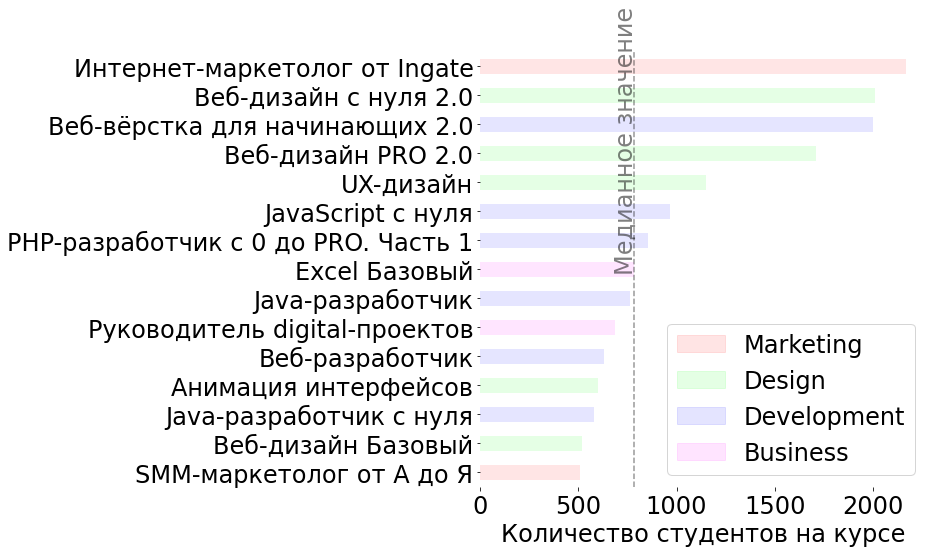

In [3]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
#%matplotlib inline
# Делаем побольше картинку и шрифт
plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams["font.size"] = 24

# Сортируем данные и сохраняем в отдельный Series
bar_data = merged_data.groupby(['title'])['student_id'].nunique().sort_values()

# Раскрашиваем столбцы диаграммы в соответствии со сферой, к которой принадлежит курс
alpha = .1
colormapping = {
    'Marketing' : [1., 0., 0., alpha],   #ref 
    'Design' : [0., 1., 0., alpha],      #green
    'Development' : [0., 0., 1., alpha], #blue
    'Business' : [1., 0., 1., alpha]     #magenta
};
courses.index = courses['title']
colorlist = []
for course in bar_data.index:
    colorlist.append(colormapping[courses['field'][course]])

# Строим диаграмму
bar_data.plot.barh(color = colorlist)

# Определяем положение медианы
mx = bar_data.median()
my = plt.ylim()

# Рисуем медиану
plt.axvline(x=mx, ls='--', c='k', alpha=0.4)
plt.text(mx - 100, sum(my) * 0.5, 'Медианное значение', rotation='vertical', fontsize=24, color='k', alpha=0.5)

# Рисуем легенду
plt.legend(handles = [mpatches.Patch(color=color, label=label) for label, color in colormapping.items()])

plt.box(on=None)
plt.ylabel("")
plt.xlabel("Количество студентов на курсе")

### 1.4 Описание данных

За описываемый период времени компания skillbox имеет 15 курсов, которые делятся на четыре подкатегории: бизнес, дизайн, разработка и маркетинг. Каждый курс имеет в своем составе от восьми до двадцати одного модуля. Основная чать курсов состоит из, примерно, двадцати модулей. Каждый модуль может состоять из нескольких (примерно, до двадцати) уроков. Медианное количество уроков в модулях, примерно, одинаковое для дольшинства курсов и колеблется в интервале от двух до семи уроков. Однако, курс "Java-разработчик c нуля" выделяется на фоне остальных и имеет медианное значение тринадцать уроков на модуль. При этом можно заметить, что количество модулей в курсе "Java-разработчик c нуля" является одним из самых низких.
Средний и медианный возраста обучающихся в skillbox за описываемый период очень близки и составляют примерно 28-30 лет, практически, независимо от курса. Реальный минимальный возраст обучающихся составляет в районе 15-18 лет, максимальный - примерно 60 лет. 
Если судить по общему количеству студентов на курсах, то видно, что наибольшей привлекательностью для студентов обладают курсы из сферы дизайна, но при этом самым привлекательным является курс из сферы маркетинга "Интернет маркетолог от Ingate".

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

### 2.1 Прирост студентов на каждом курсе

In [4]:
# Задаем датасет, в котором будем считать прирост студентов
# Индексы этого датасета формируем с помощью функции data_range, в качестве колонок используем названия курсов
student_grow = pd.DataFrame(
    0.0,
    index=pd.date_range(start='2016/03/01', end='2019/07/01', freq='MS'), 
    columns=courses['title'])
# Вычисляем датасет student_start, который содержит начала тех месяцев, в которые каждый 
# из студентов начал делать первую домашнюю работу
student_start = merged_data[merged_data['is_homework']].groupby(['title','student_id'])['start_date'].nsmallest(1)
student_start = student_start.astype('datetime64[M]').to_frame()

In [5]:
for name, nstudents in student_start.groupby(['title', 'start_date']).size().items():
    student_grow[name[0]][name[1]] = nstudents

In [6]:
student_grow

title,Java-разработчик c нуля,Веб-дизайн Базовый,Excel Базовый,Руководитель digital-проектов,Веб-вёрстка для начинающих 2.0,JavaScript с нуля,Анимация интерфейсов,Веб-дизайн PRO 2.0,UX-дизайн,Интернет-маркетолог от Ingate,Веб-дизайн с нуля 2.0,Веб-разработчик,SMM-маркетолог от А до Я,PHP-разработчик с 0 до PRO. Часть 1,Java-разработчик
2016-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2016-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


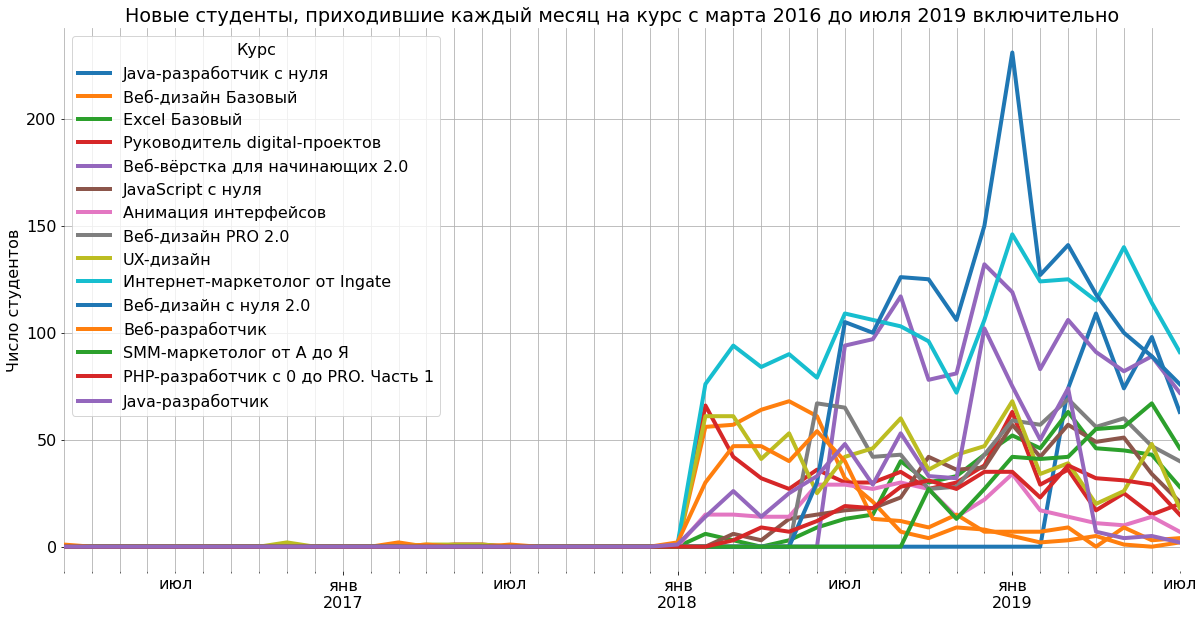

In [7]:
import locale
# Заметим, что данные по начальным датам обучения студентов уже присутствют в датасете ages
# Установим российскую локаль
locale.setlocale(locale.LC_TIME, ('RU', 'UTF-8'))
# Сделаем картинку побольше
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 16
# plt.figure(figsize=(20,10))

# Строим график
student_grow.plot(lw=4)
plt.title('Новые студенты, приходившие каждый месяц на курс с марта 2016 до июля 2019 включительно')
plt.ylabel('Число студентов')
plt.box(on=None)
plt.legend().set_title('Курс')
plt.grid(which='both')

### 2.2 Число прогрессов по выполнению домашних работ на каждом курсе

In [8]:
# Сделаем отдельный датасет для сохранения процессав выполнения домашних работ:
# Индексы - месяцы, колонки - названия курсов
task_process = pd.DataFrame(0.0, index=student_grow.index, columns=student_grow.columns)

In [9]:
# Пересчитаем столбцы с датами начала и датами конца в месяцы и сохраним отдельными стобцами
merged_data['start_date_1'] = merged_data['start_date'].astype('datetime64[M]')
merged_data['finish_date_1']= merged_data['finish_date'].astype('datetime64[M]')

In [10]:
# Посчитаем число месяцев выполнения каждого прогресса
merged_data['nmonths'] = (
    (merged_data['finish_date_1'] 
     - merged_data['start_date_1']) / np.timedelta64(1, 'M') + 1).fillna(1.).astype(int)
merged_data['nmonths'][merged_data['nmonths'] <= 0] = 1

/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [11]:
# сделаем списки месяцев выполнения по каждому прогрессу
from pandas.tseries.offsets import MonthBegin
merged_data['months_list'] = merged_data[['start_date_1', 'nmonths']].apply(
    lambda row : [row[0] + MonthBegin(i) for i in range(row[1])], axis=1
)

In [12]:
# пройдем по домашним заданиям и сохраним в task_process их количество
for name, nprogs in merged_data[merged_data['is_homework']]\
            .explode('months_list').groupby(['title', 'months_list'])['progress_id'].count().items():
    task_process[name[0]][name[1]] = nprogs

In [13]:
task_process

title,Java-разработчик c нуля,Веб-дизайн Базовый,Excel Базовый,Руководитель digital-проектов,Веб-вёрстка для начинающих 2.0,JavaScript с нуля,Анимация интерфейсов,Веб-дизайн PRO 2.0,UX-дизайн,Интернет-маркетолог от Ingate,Веб-дизайн с нуля 2.0,Веб-разработчик,SMM-маркетолог от А до Я,PHP-разработчик с 0 до PRO. Часть 1,Java-разработчик
2016-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
2016-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


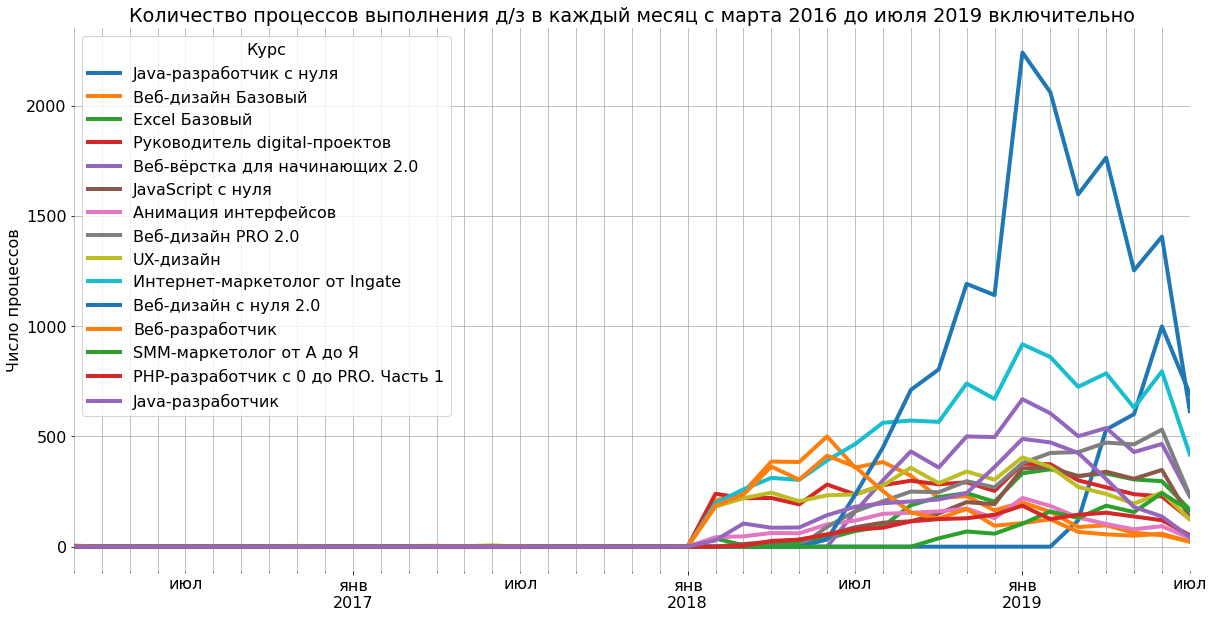

In [14]:
# Построение одного графика с 15ю зависимостями кол-ва домашних работ по месяцам
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 16
# plt.figure(figsize=(10, 10))
task_process.plot(lw=4)
plt.box(on=None)
plt.ylabel('Число процессов')
plt.legend().set_title("Курс")
plt.title("Количество процессов выполнения д/з в каждый месяц с марта 2016 до июля 2019 включительно")
plt.grid(which='both')

### 2.3 Вывод
Из графиков видно, что зависимости количества процессов по выполнению домашних работ с некоторым временным лагом отслеживают приток студентов. Этот лаг может быть разным для разных курсов, имеет смысл его проанализировать, чтобы понять как быстро ожидать увеличения/уменьшения нагрузки на преподавателей, вызванное увеличением/уменьшением притока студентов.
Даже, если количество процессов по выполнению домашних работ на данном отрезке увеличивается, то в будущем все равно следует ожидать спад, если приток студентов уменьшается (см., например, графики java-разработчик с нуля). 
Для более детального исследования нагрузки на преподавателей необходимо проанализировать также статистику по преподавателям, которой здесь не представлено. 
  * На курсе **java-разработчик с нуля** происходит плавное снижение числа студентов с одновременным ростом количества процессов по выполнению домашних работ. Однако данных по этом курсу недостаточно, чтобы сделать вывод о том, что данное снижение будет таким же и далее. Возможно, что наблюдаемый эффект имеет сезонную природу. Статистика по данному курсу пока недостаточна для построения прогнозов.
  * На курсе **web-дизайн базовый** имеется пик прироста студентов с июля 2017 по ноябрь 2018. Соответствующий график процессов по выполнению домашних заданий также имеет пик с затянутым вправо "хвостом", явно уходящий в ноль. Совершенно очевидно, что график процессов по выполнению домашних заданий отслеживает пик притока студентов.

  * Соответствующие графики для курса **excell базовый** также имеют пики, но более широкие. В августе 2019 следует ожидать постепенного снижения нагрузки на преподавателей на данном курсе.
  * Курс руководитель **digital проектов** имеет постоянный приток студентов и постоянное количество процессов по выполнению домашних работ с учетом статсистических флуктуаций. Каких-либо изменений в текущем уровне нагрузке на данном курсе не предвидится.
  * Курс **веб-верстка** для начинающих также стабилен. Несмотря на резкое падение притока студентов на данном курсе, в июле-августе 2018, сейчас каких-то существенных изменения или колебаний тут, по-видимому, не предвидится.
  * На курсе **javascript с нуля** приток студентов и количество процессов выполнения домашних заданий уменьшается: в будущем следует ожидать снижений нагрузки на преподавателей
  * На курсе **анимация интерфейсов** также тенденция на снижения. Нагрузка на преподавателей будет снижаться.
  * На курсе **веб-дизайн pro 2.0** наблюдается снижение с выходом на стабильный уровень притока 50 студентов в месяц. На соответствующем графике процессов выполнения домашних работ присутствует снижение, в будущем, по-видимому, тут также наметится выход на постоянное число процессов выполнения домашних работ в месяц.
  * На курсе **UX дизайн**  присутсвует большой приток студентов в 2018 и небольшое снижение притока в 2019. Количество процессов по выполнению домашних работ снижается. Следует ожидать тут некоторого снижения нагрузки с выходом на стабильный уровень.
  * Курс **интернет-маркетолог от Ingate** приток стабилен. На графике процессов выполнения домашних работ, по-видимому, намечается выход на плато. Существенных изменений нагрузки на преподавателей не предвидится.
  * Курс **веб дизайн с нуля 2.0** приток пока более-менее стабилен. На графике процессов выполнения домашних заданий некоторый спад, возможно, объясняющийся либо, тем, что данная зависимость отслеживает пик на зависимости притока студентов, имевший место в январе 2019, либо, тем, что данный пик имеет сезонную природу.
  * Курс **веб разработчик** резкий пик постоянного прироста в январе-июле 2018 года, который отслеживается на зависимости процессов выполнения домашних работ. Нагрузка на преподавателей имеет тенденцию на снижение.
  * На курсе **SMM-маркетолог от А до Я** приток в целом стабилен, имеются сильные флуктуации, возможно, связанные с сезонностью. На соответствующем графике процессов выполнения домашних заданий ожидается выход на плато. Существенного увеличения нагрузки на данном курсе не предвидится.
  * Курс **РНР-разработчик с нуля до PRO. Часть 1**: после пика в январе 2019 приток студентов вышел на постоянный уровень. На графике процессов выполнения домашних работ намечается спад. Предполагается, что после некоторого снижения нагрузка на преподавателей выйдет на постоянный уровень
  * Курс **java-разработчик** прирост студенов упал, практически за нуля. На графике процессов выполнения домашних работ следует ожидать постепенного ухода в ноль. Нагрузка скоро совсем изчезнет.

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [15]:
# Cоздаем два отдельных датасета для стартовых и финальных дат
start_dates = merged_data[merged_data['is_homework']]\
    .groupby(['title', 'module_number', 'student_id'])['start_date'].nsmallest(1).to_frame()
finish_dates = merged_data[merged_data['is_homework']]\
    .groupby(['title', 'module_number', 'student_id'])['finish_date'].nlargest(1).to_frame()
# Сливаем их в один датасет
dates = pd.merge(start_dates, finish_dates, left_index=True, right_index=True)
# Вычисляем время прохождения модуля в днях
dates['time'] = (dates['finish_date'] - dates['start_date']).apply(lambda t: t.days)
#  Вычисляем статистику времен прохождения модуля по курсам
dates.groupby(['title', 'module_number'])['time'].agg(['min', 'max', 'median', 'mean'])

min  max  median       mean
title                         module_number                             
Excel Базовый                 1                0  183     2.0   5.467249
                              2                0  184     1.0   3.768473
                              3                0   89     1.0   2.860465
                              4                0  327     3.0  10.376238
                              5                0  175     2.5   6.818519
...                                          ...  ...     ...        ...
Руководитель digital-проектов 12               0  211     7.0  20.727273
                              13               0  246    11.0  25.521739
                              14               0  199     7.0  14.078125
                              15               0  132     2.0   6.093750
                              16               0  355     6.0  17.620690

[190 rows x 4 columns]

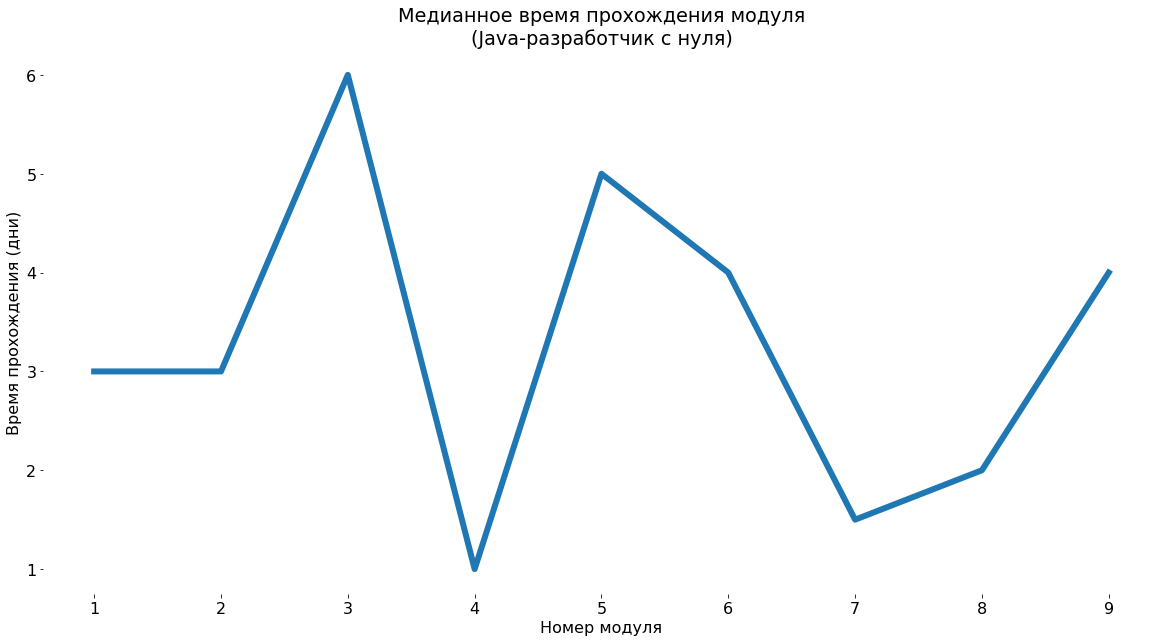

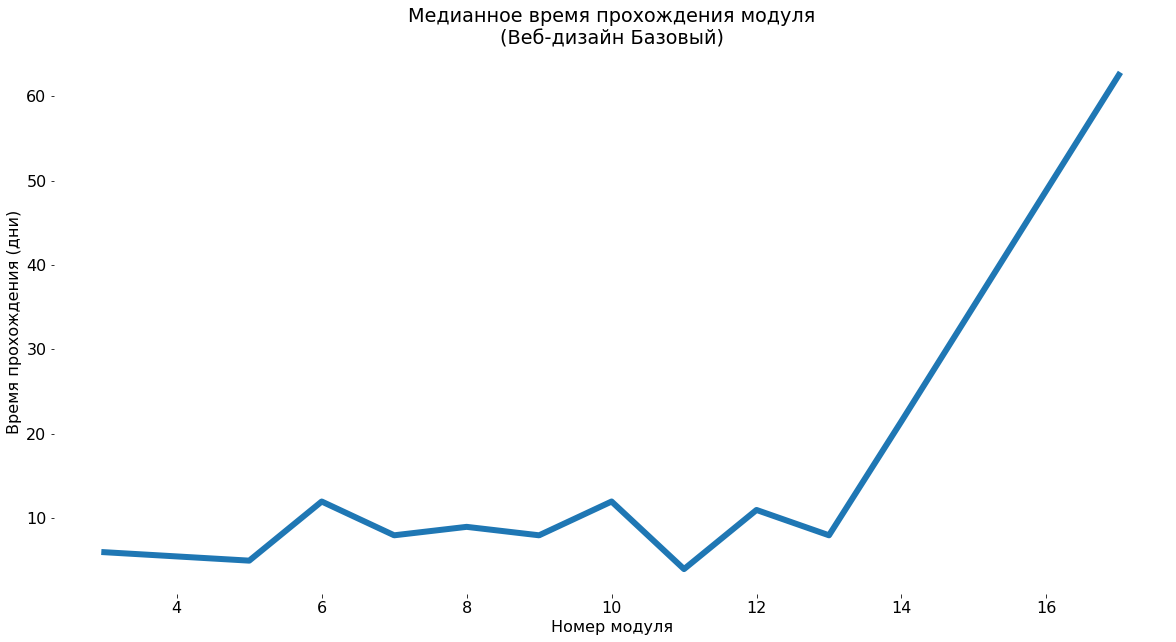

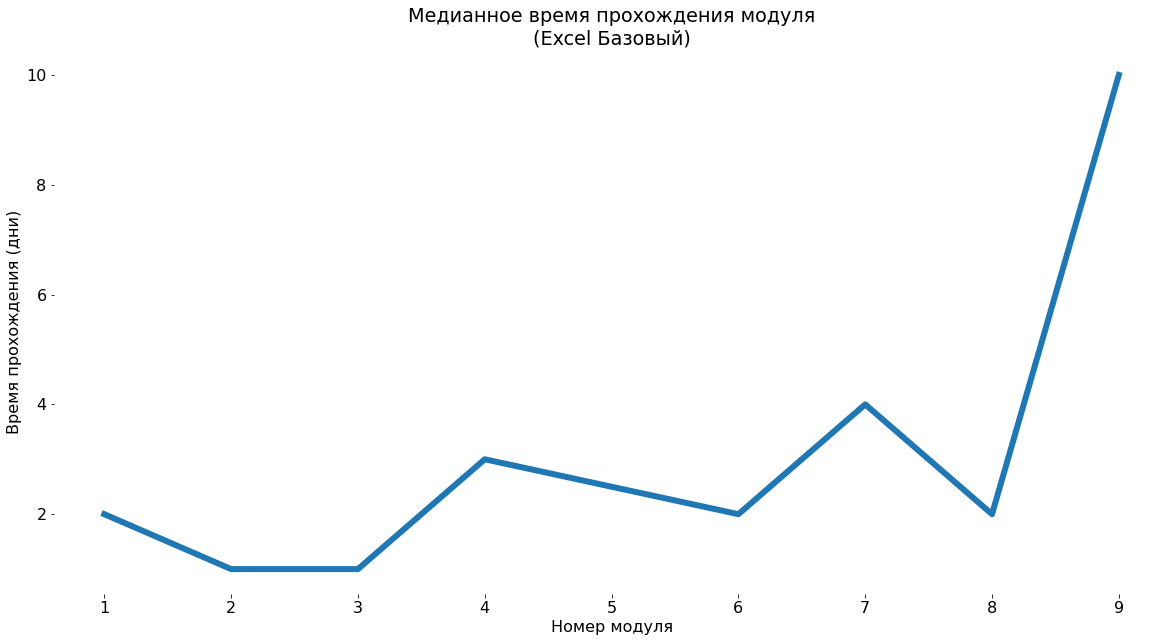

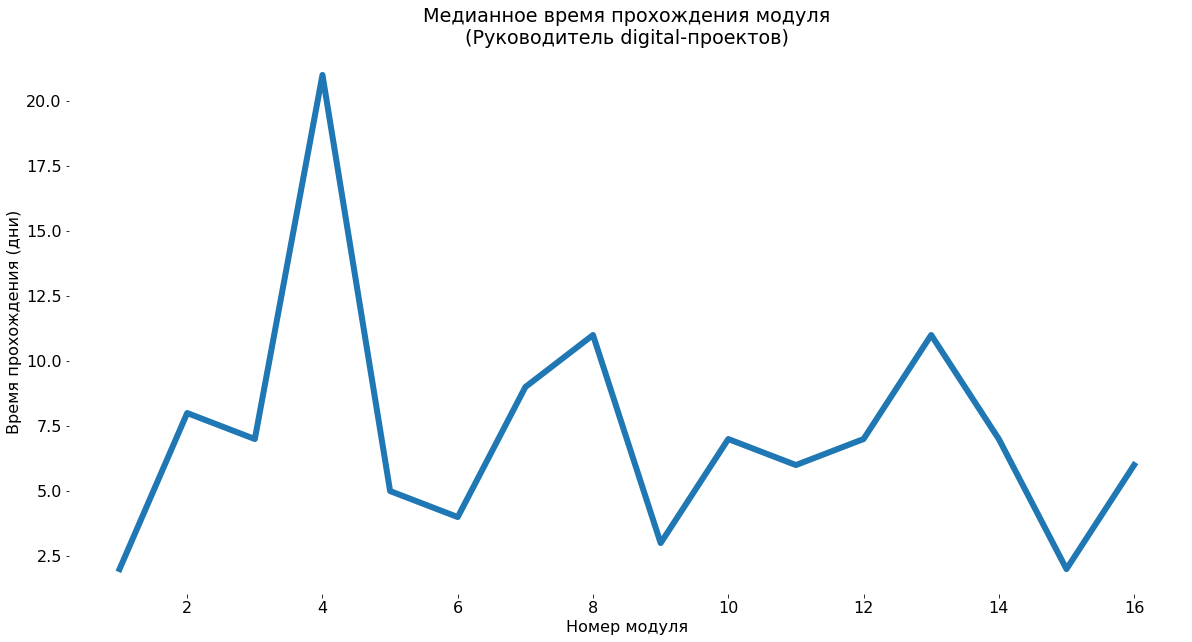

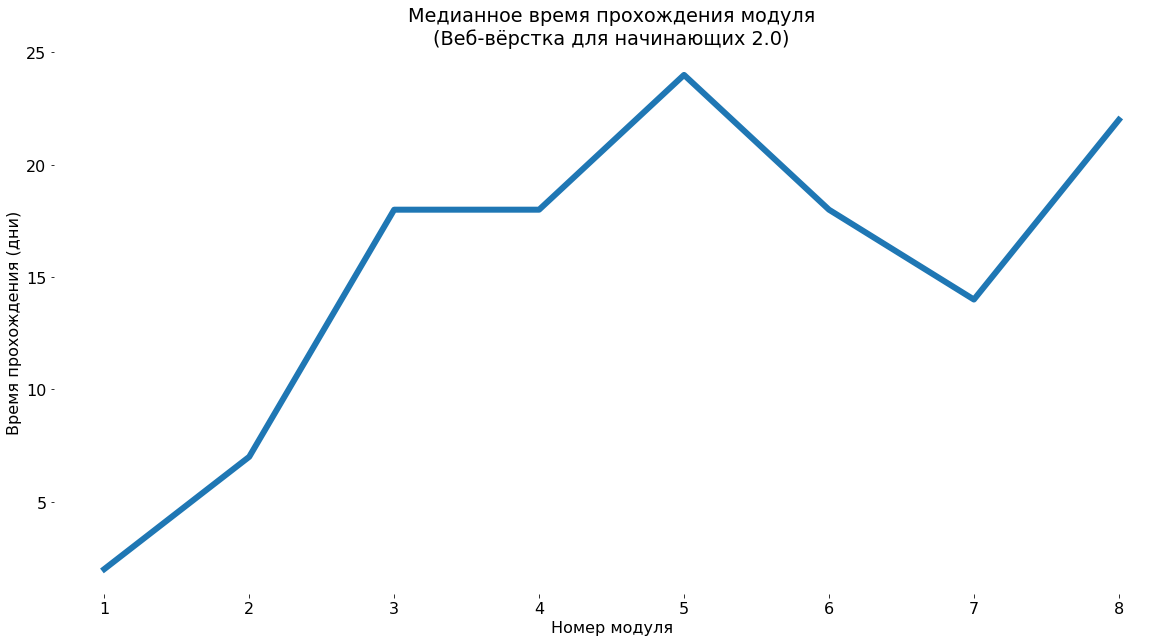

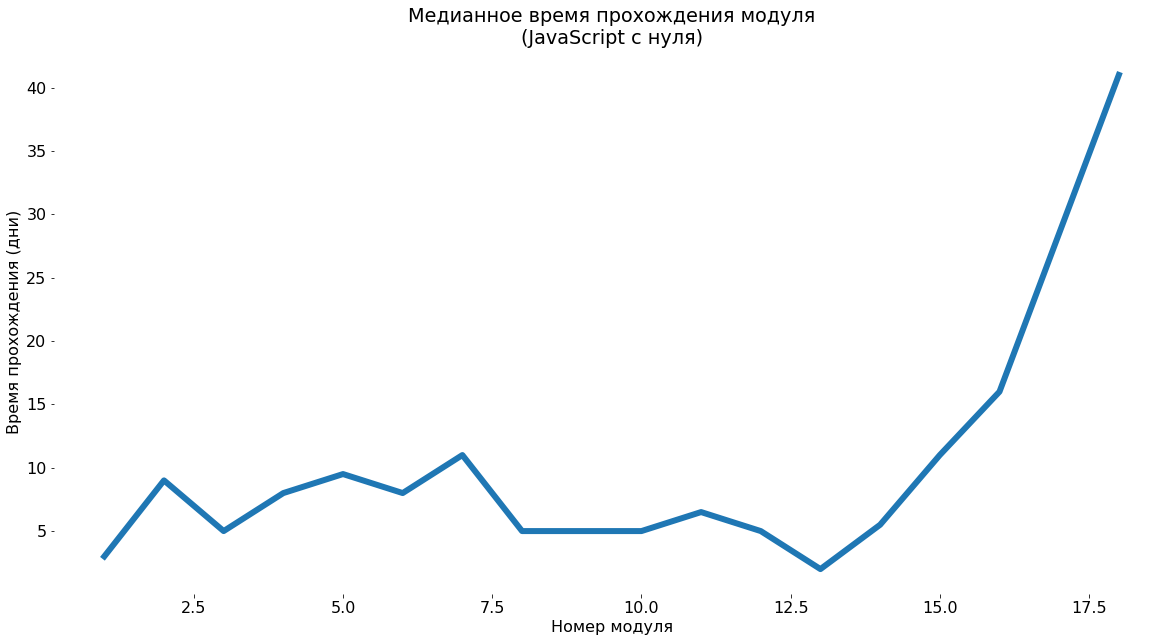

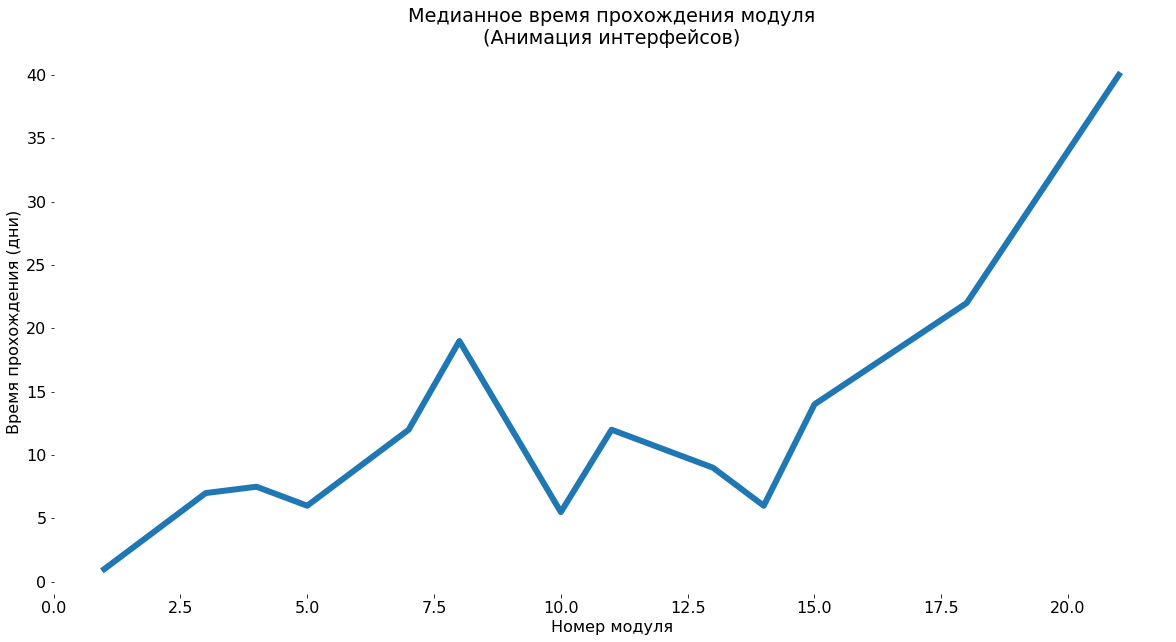

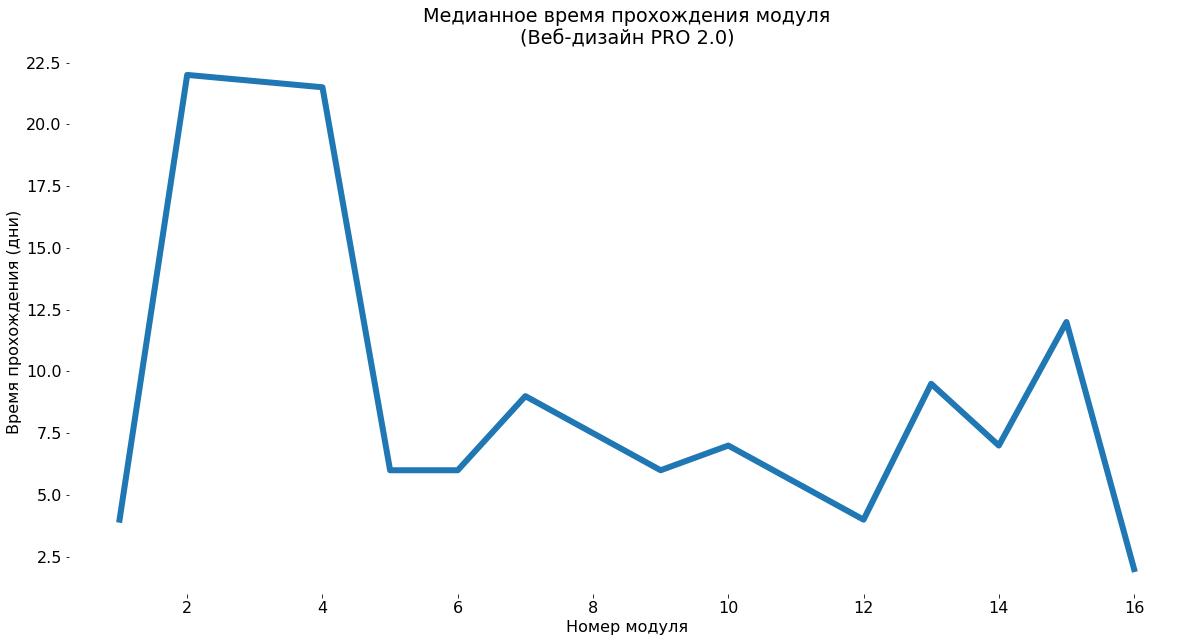

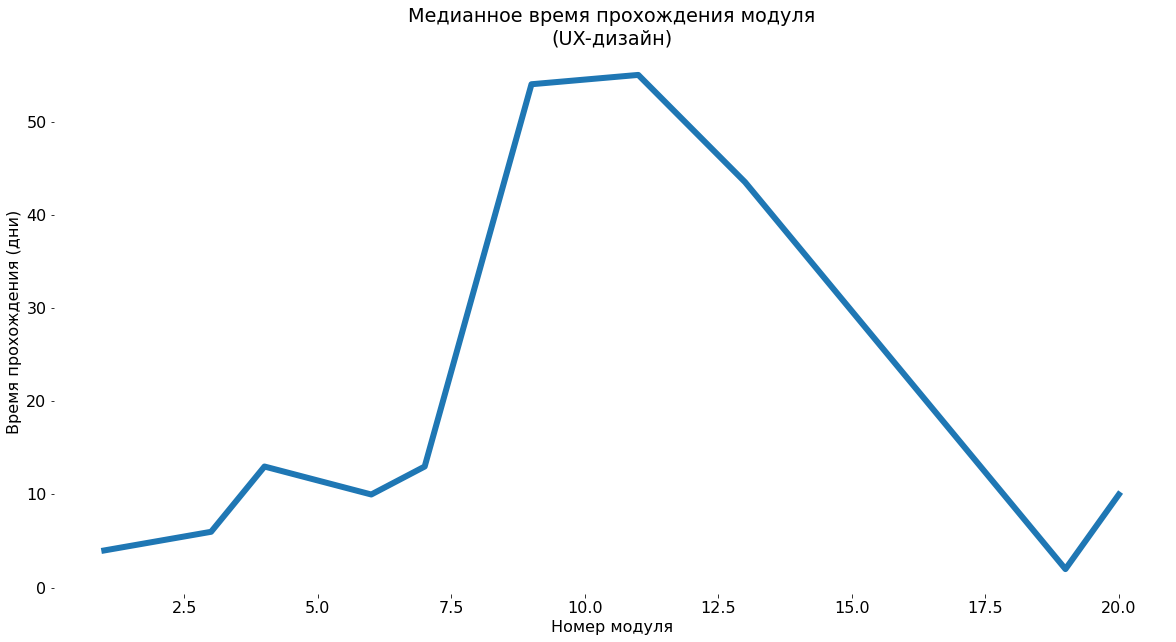

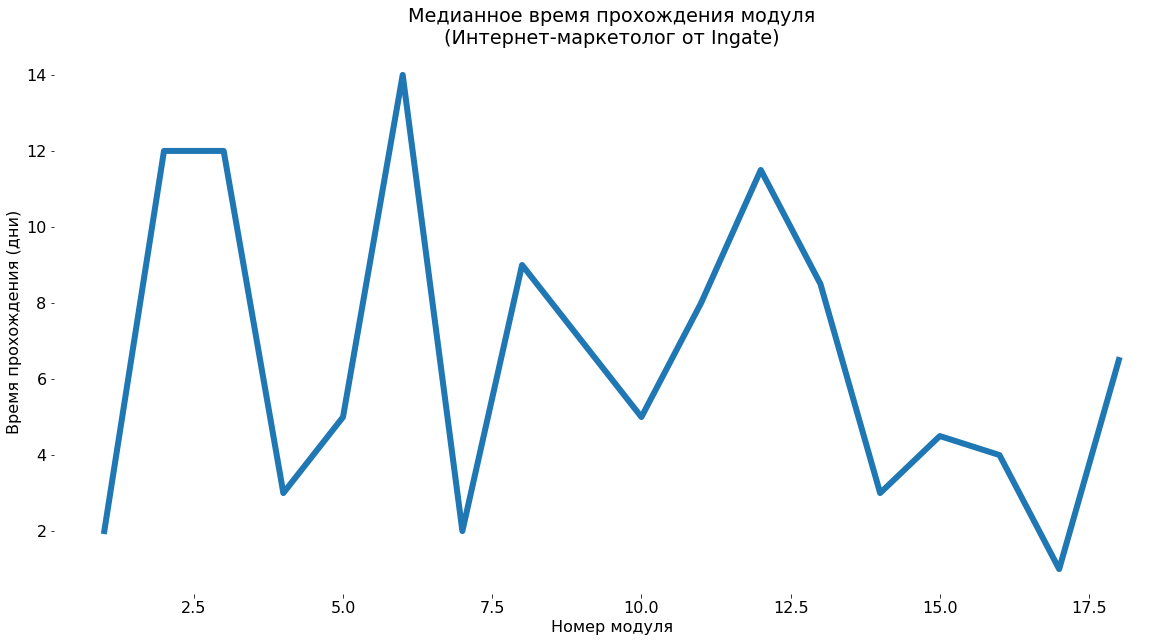

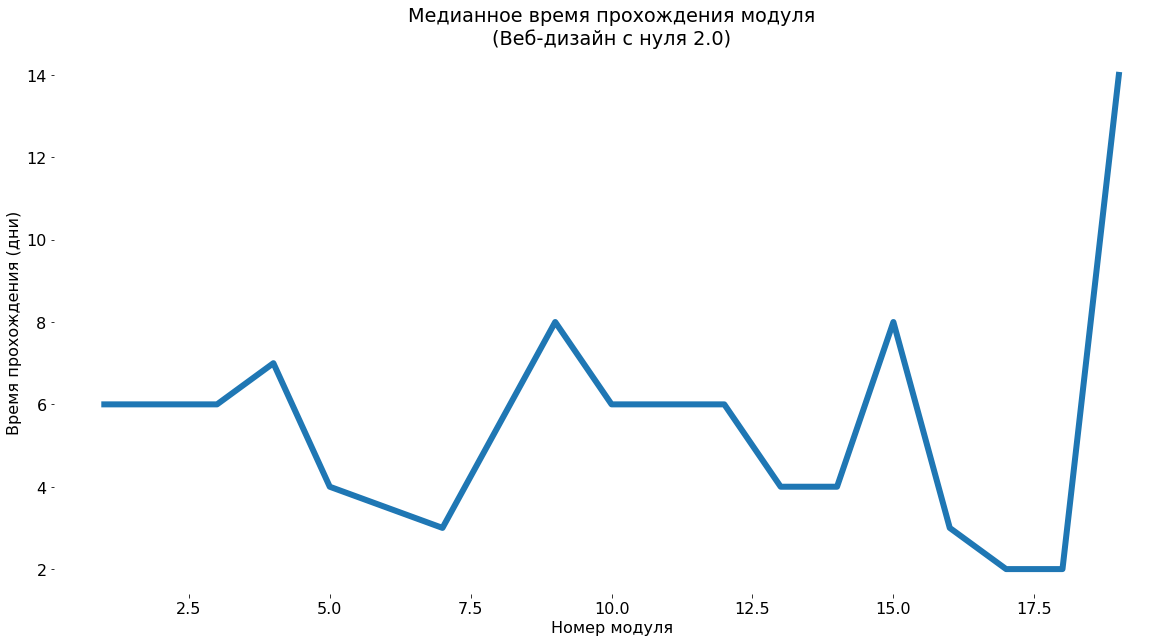

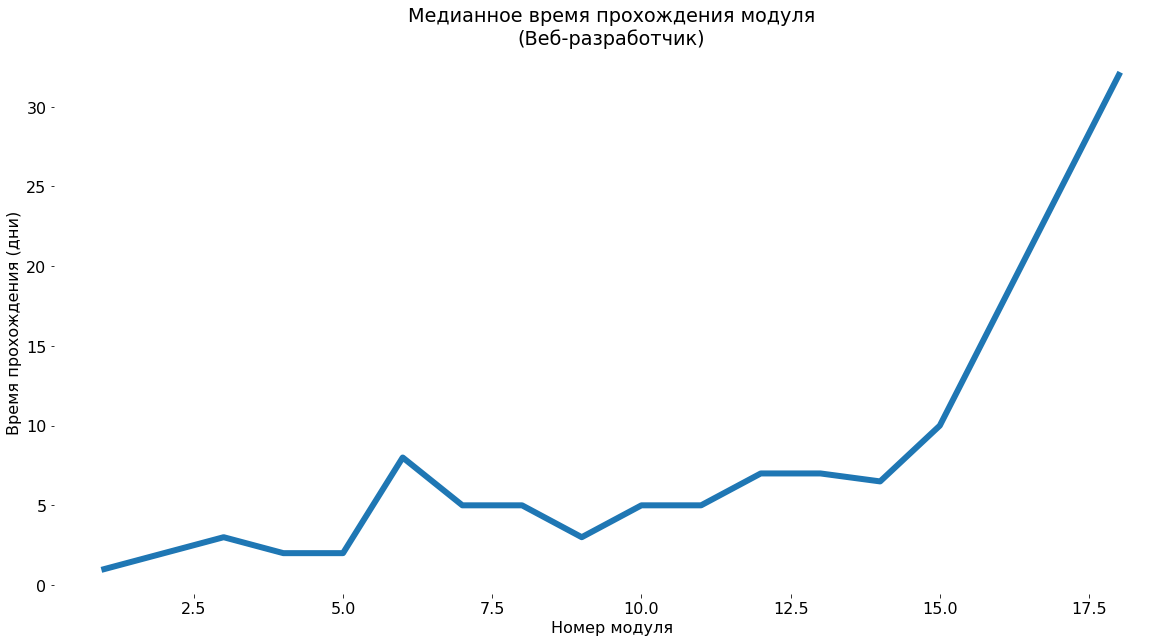

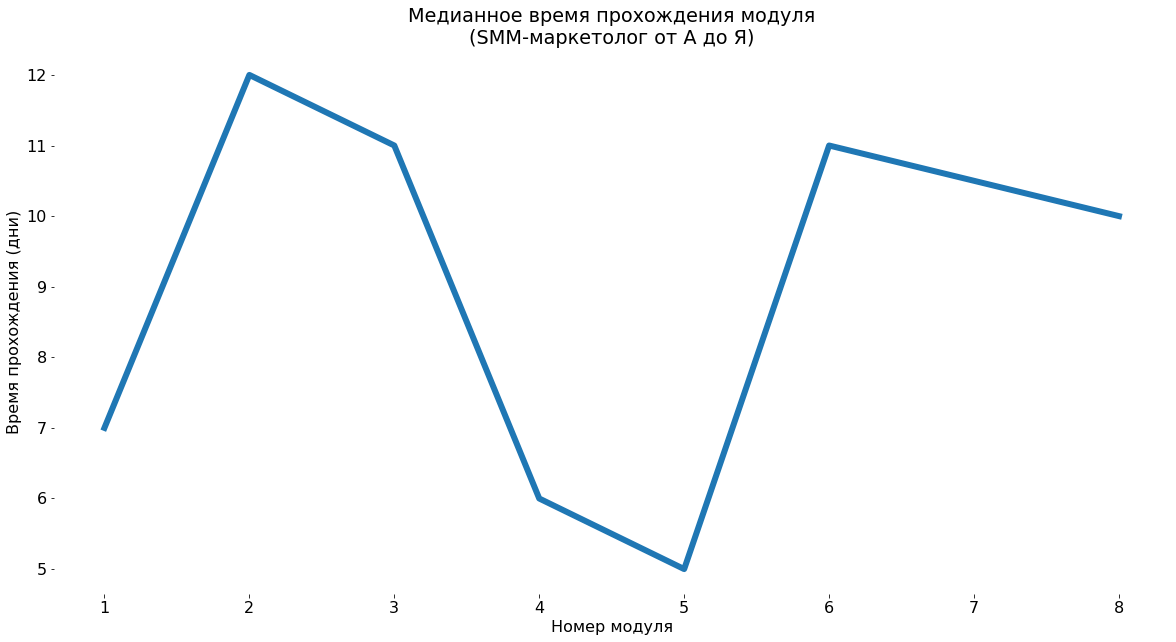

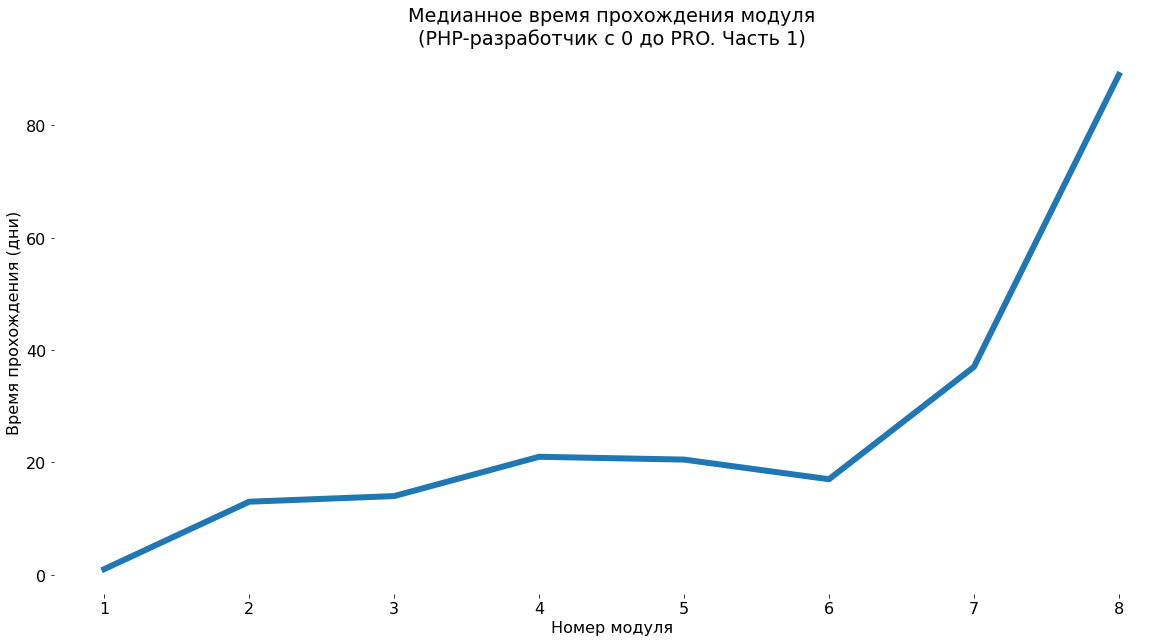

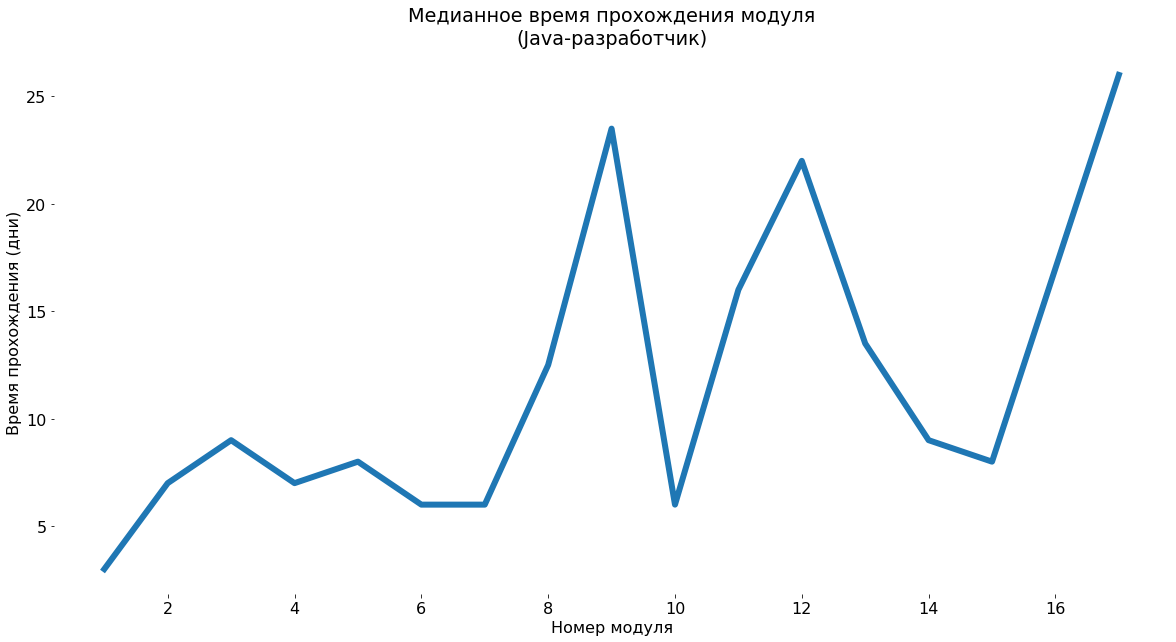

In [16]:
# Строим график зависимости медианного времени прохождения в днях от номера модуля
plot_data = dates.groupby(['title', 'module_number'])['time'].agg('median')
for title in courses['title']:
    plt.figure()
    plot_data.xs(title).plot(lw=6)
    plt.title('Медианное время прохождения модуля\n' + '(' + title + ')')
    plt.box(on=None)
    plt.ylabel('Время прохождения (дни)')
    plt.xlabel('Номер модуля')

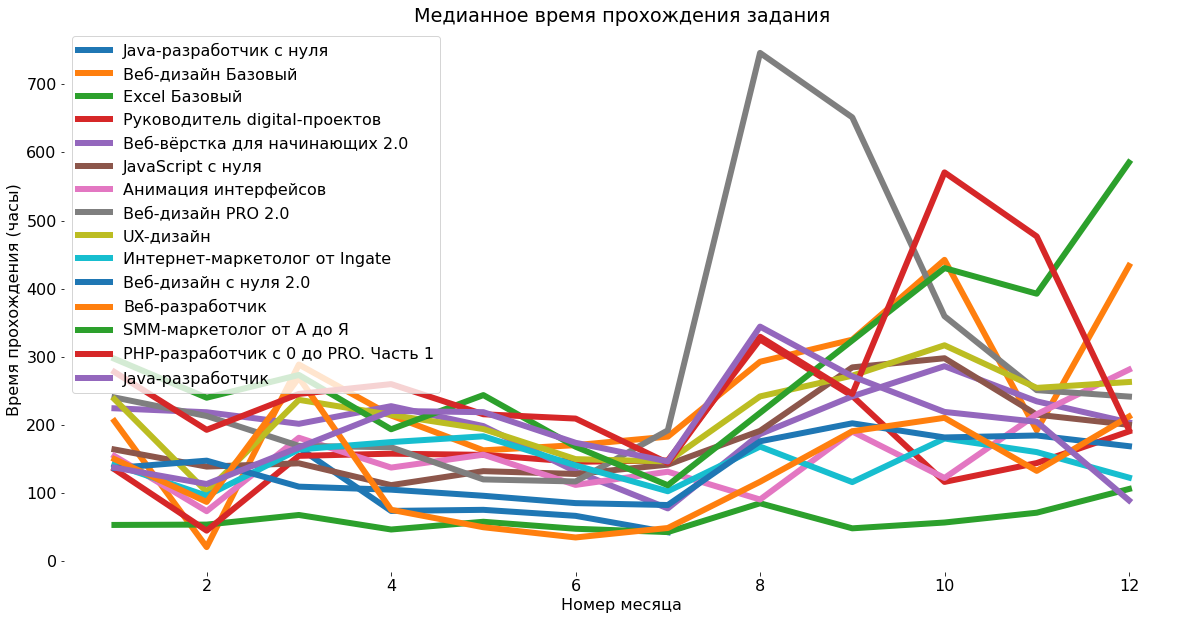

In [17]:
# Строим графики зависимости медианного времени прохождения задания от номера месяца
season_tasks = pd.DataFrame()
#######################################################################
# Создаем новую колонку номеров стартовых месяцев начала выполнения задания
season_tasks['month_number'] = merged_data[merged_data['is_homework']]['start_date'].apply(lambda t: t.month)
# Создаем колонку времен выполнения задания в часах
season_tasks['task_time'] = (merged_data['finish_date'] - merged_data['start_date'])[merged_data['is_homework']].apply(
    lambda dt: dt.seconds / 3600 + dt.days * 24)
# колонка курсов
season_tasks['title'] = merged_data['title'][merged_data['is_homework']]
# Вычисляем медианные знечения по каждому модулю
plot_data_2 = season_tasks.groupby(['title', 'month_number'])['task_time'].median().to_frame()
# ... и строим графики
ax = plt.subplot()
for title in courses['title']:
    plot_data_2.xs(title).plot(ax=ax, lw=6)

plt.title('Медианное время прохождения задания')
plt.box(on=None)
plt.ylabel('Время прохождения (часы)')
plt.xlabel('Номер месяца')
plt.legend([title for title in courses['title']])

### 3.1 Вывод
Видно, что медианные времена выполнения домашних заданий последних модулей большинства курсов оказываются существенно больше среднего значения по курсу. Из чего можно сделать вывод, что не все студенты выполняют эти задания. Возможно задания этих модулей не являются обязательными для прохождения курса.
Из графика сезонных зависимостей можно сделать вывод, что медианные времена выполнения домашних заданий несколько увеличиваются осенью и достигают максимального значения в декабре.

## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [18]:
# Вычисляем количества студентов, приступивших к выполнению первого задания в модуле (conversion_in) и количество
# студентов, закончивших последнее задание в соотвествующем модуле (conversion_out)
conversion_in = merged_data[merged_data['is_homework']].groupby(['title', 'module_number', 'student_id'])['start_date'].nsmallest(1).to_frame()
conversion_out = merged_data[merged_data['is_homework']].groupby(['title', 'module_number', 'student_id'])['finish_date'].nlargest(1).to_frame()

In [29]:
# проверка резултата
print(f"Конверсия в Excel во втором модуле: "\
      f"{conversion_in.xs('Excel Базовый').xs(2).count()['start_date']} к "\
      f"{conversion_out.xs('Excel Базовый').xs(1).count()['finish_date']}")
print(f"Конверсия в Excel в третьем модуле: "\
      f"{conversion_in.xs('Excel Базовый').xs(3).count()['start_date']} к "\
      f"{conversion_out.xs('Excel Базовый').xs(2).count()['finish_date']}")

Конверсия в Excel во втором модуле: 434 к 458
Конверсия в Excel в третьем модуле: 398 к 406


In [19]:
# Создадим отдельный датасет для того, чтобы легче адресоваться к названиям модулей по названию курса и номеру модуля
module_titles = merged_data[merged_data['is_homework']].groupby(['title', 'module_number'])['module_title'].unique().to_frame()
module_titles['module_title'] = module_titles['module_title'].apply(lambda x : x[0])

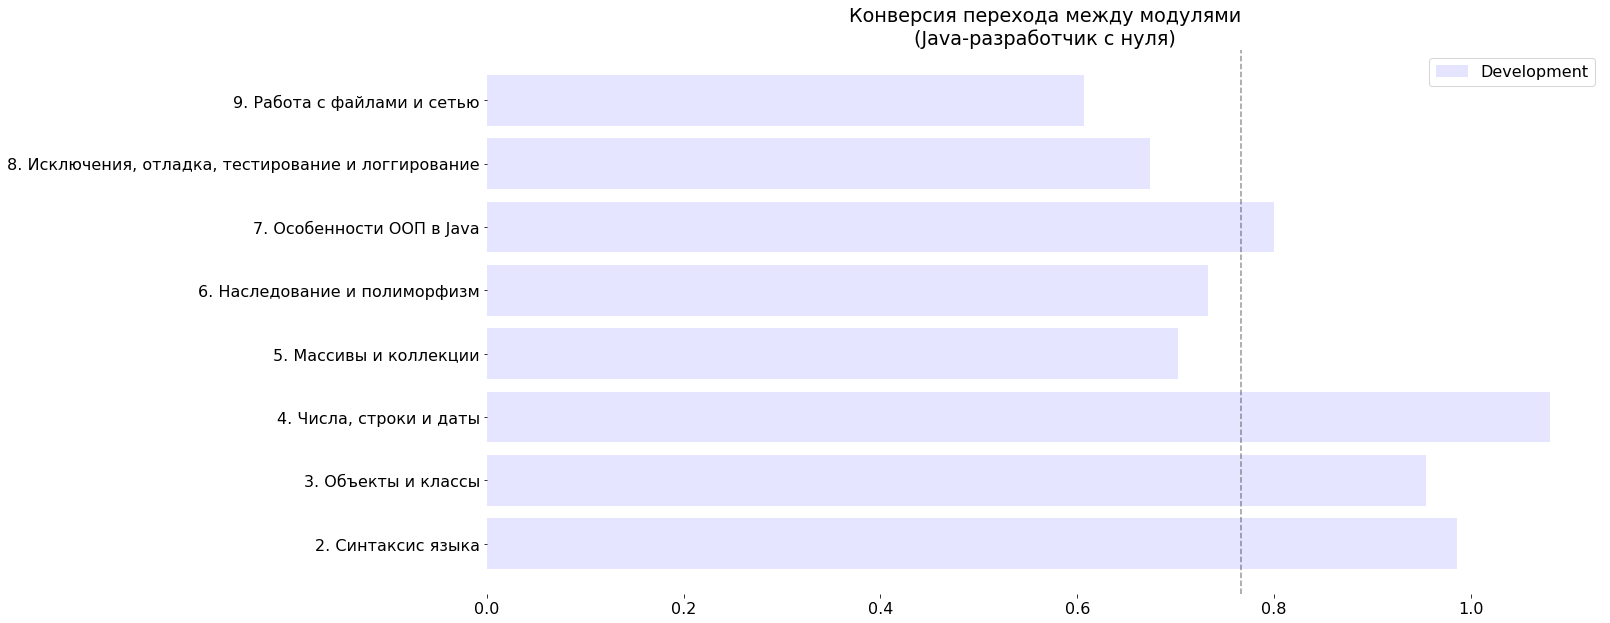

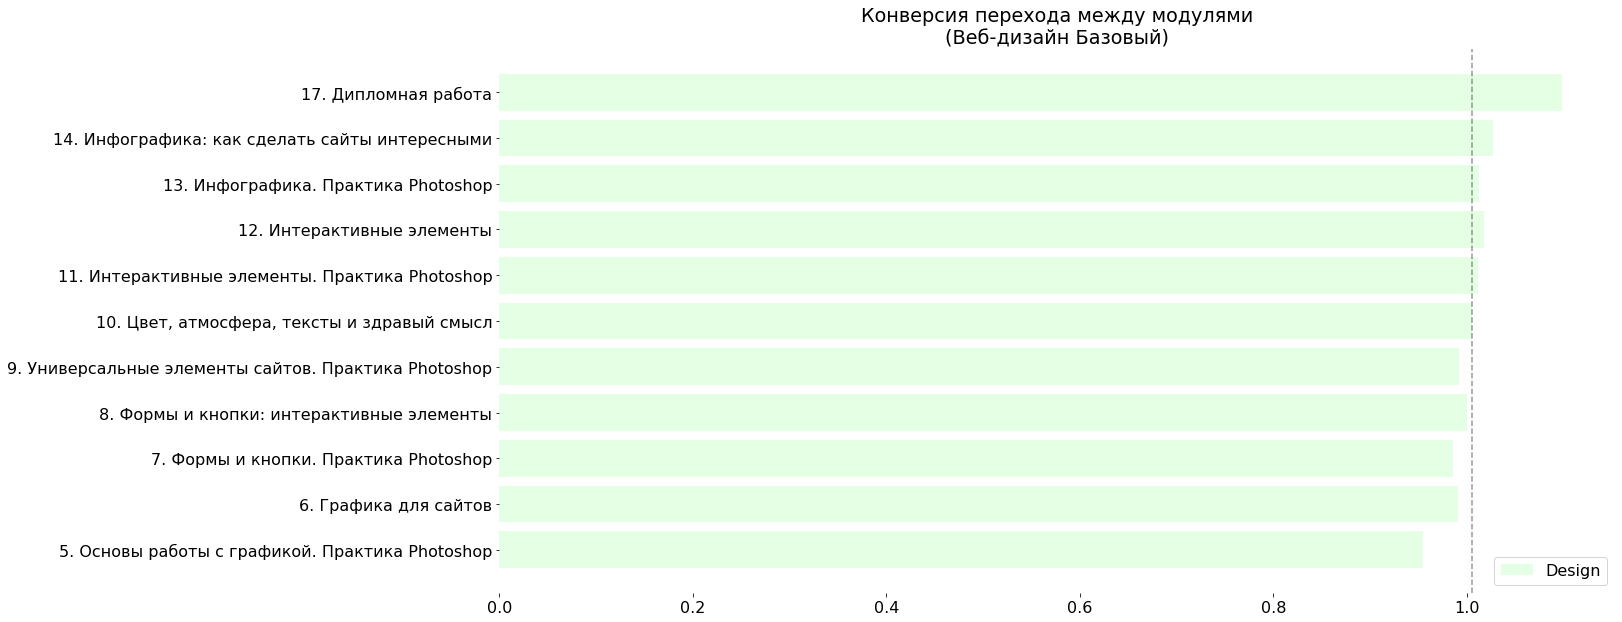

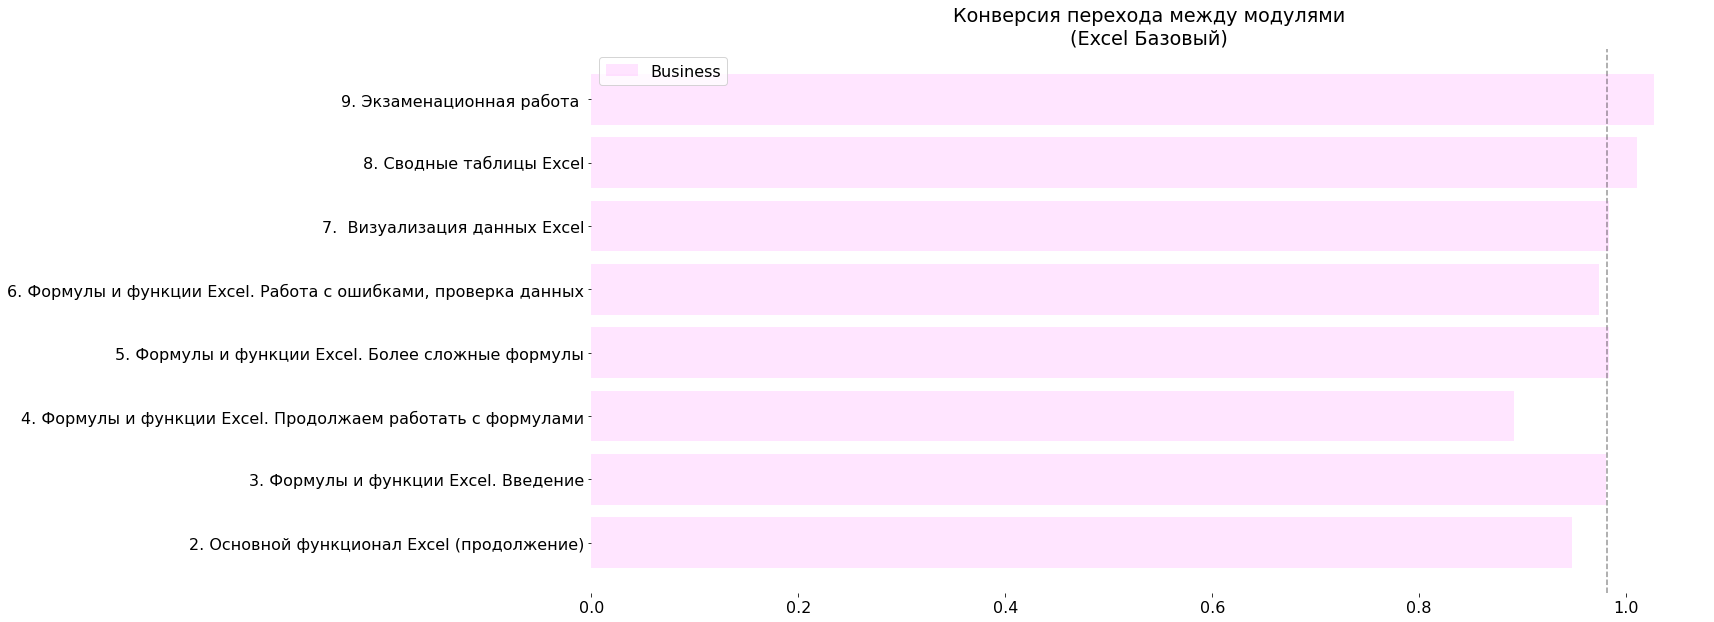

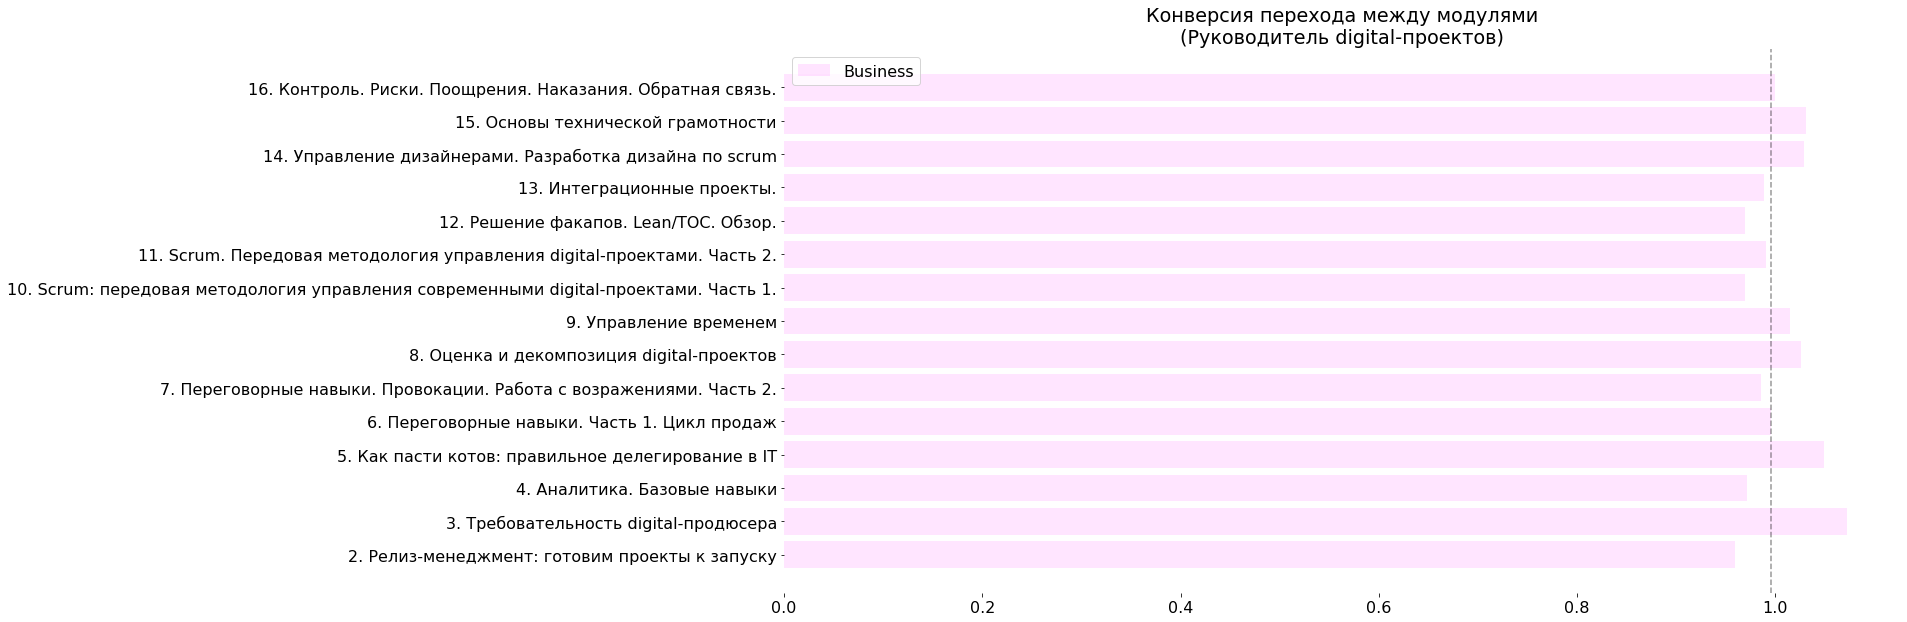

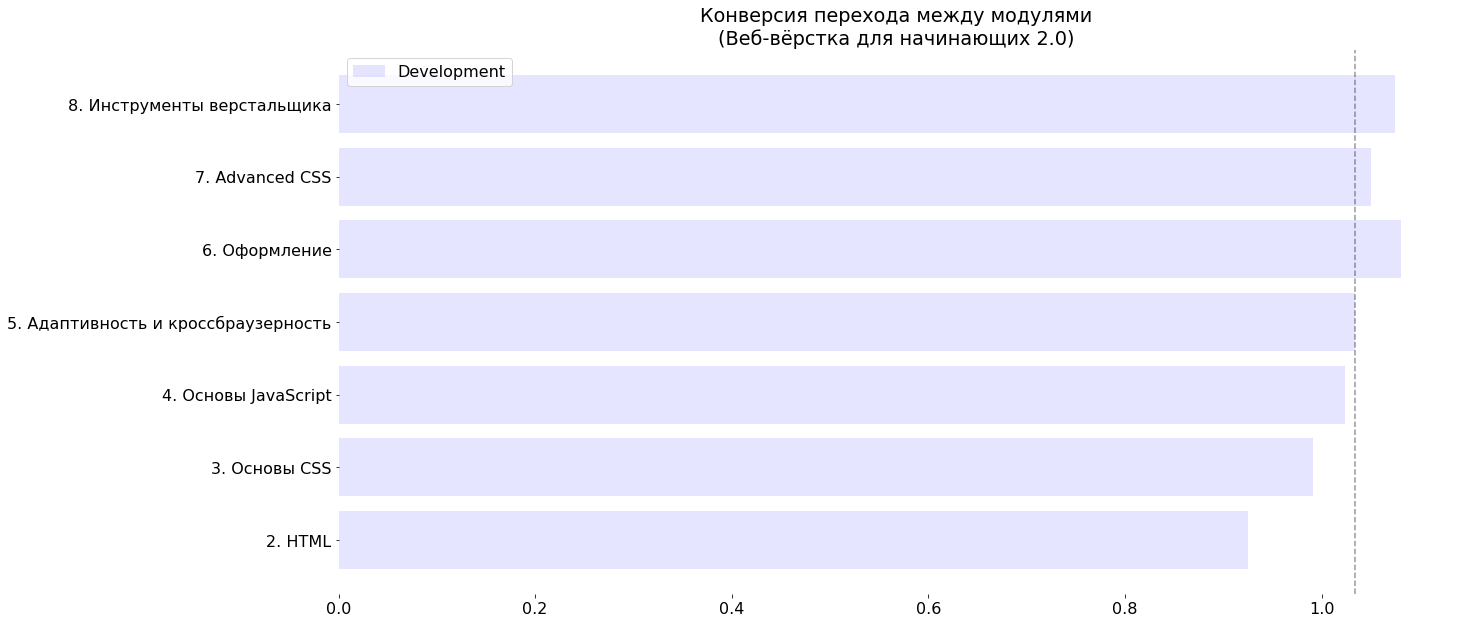

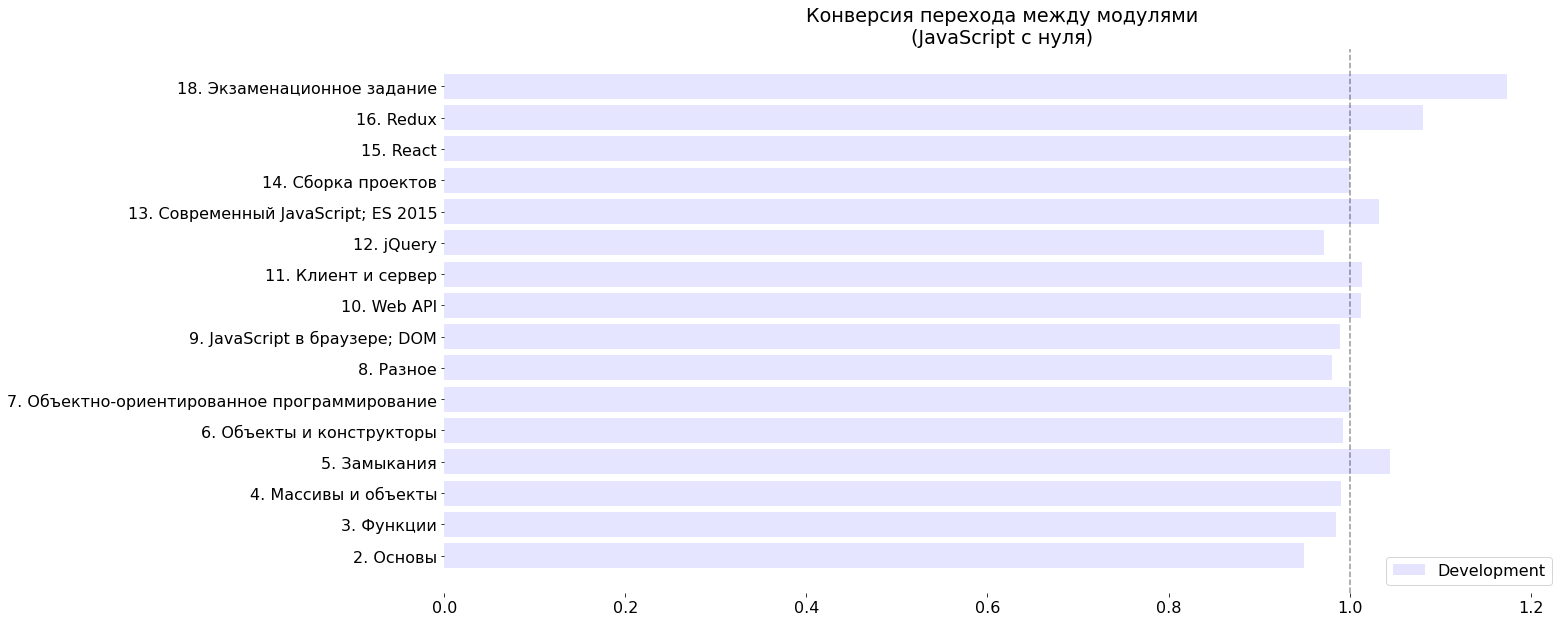

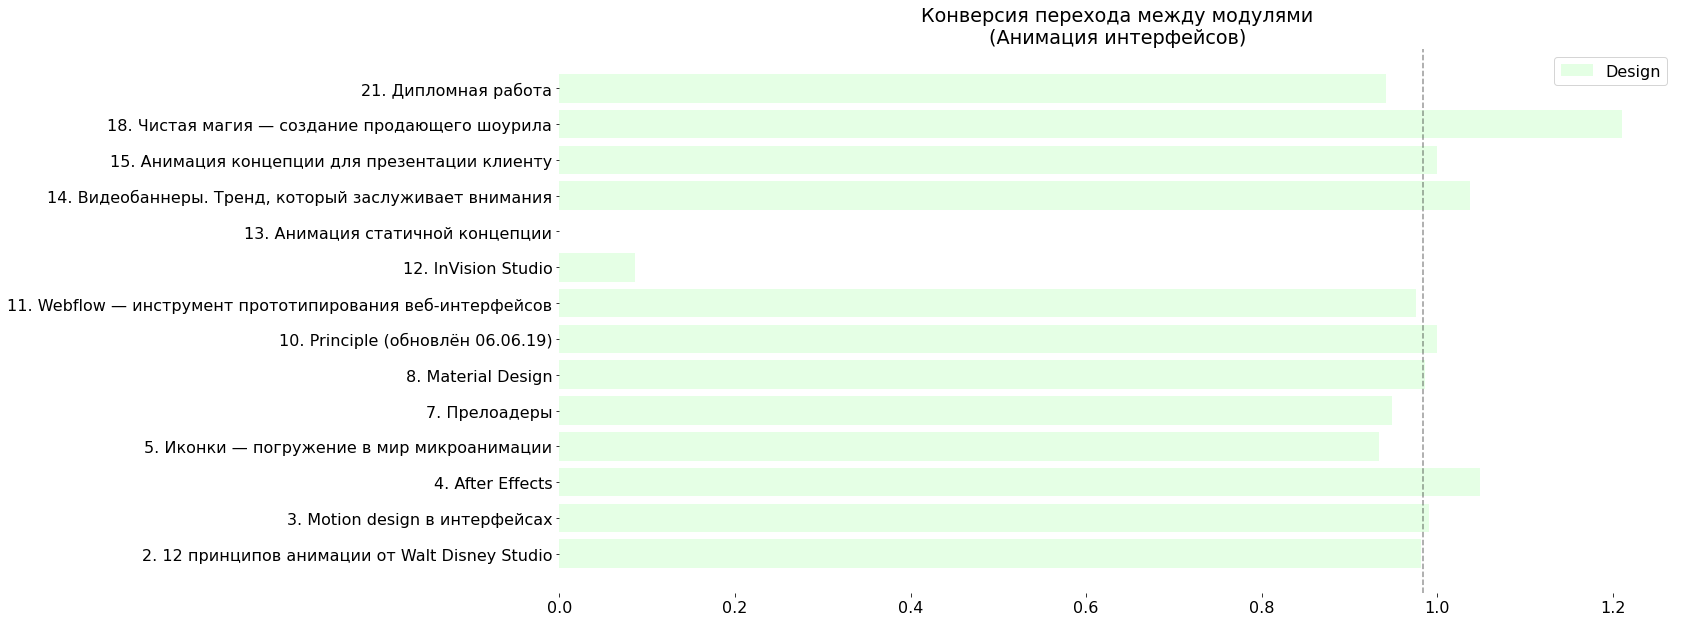

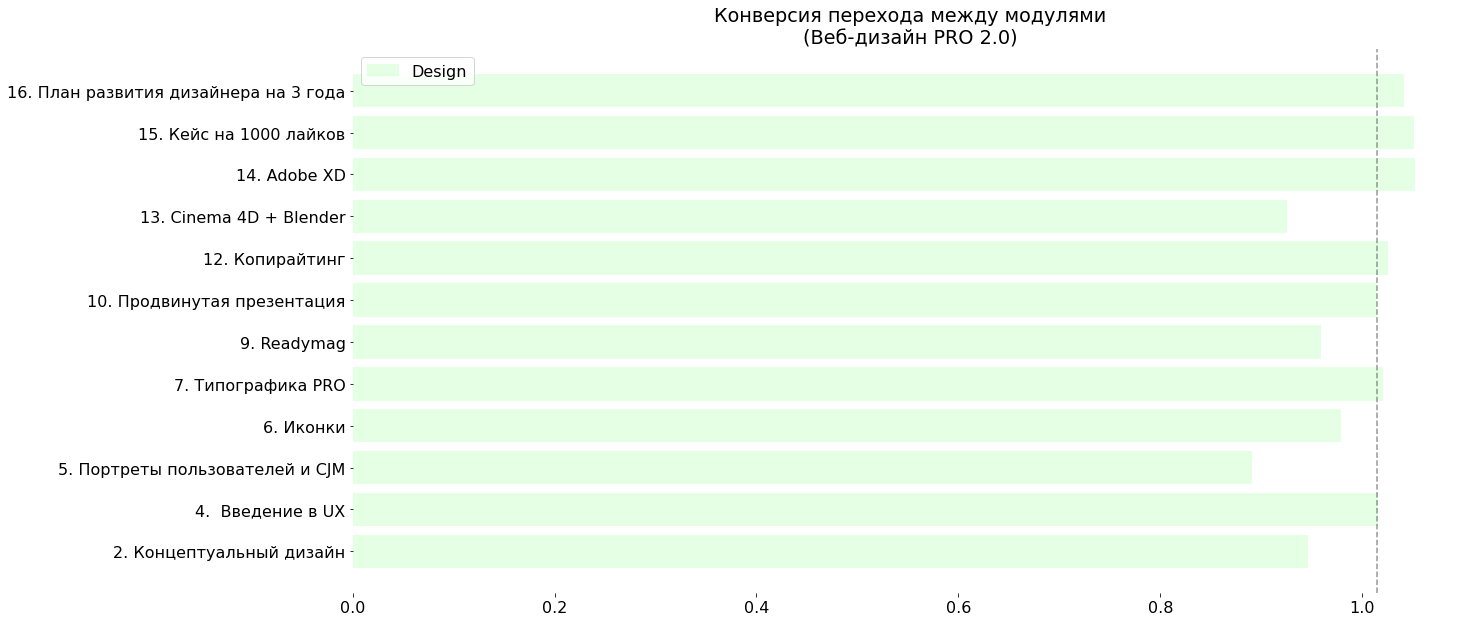

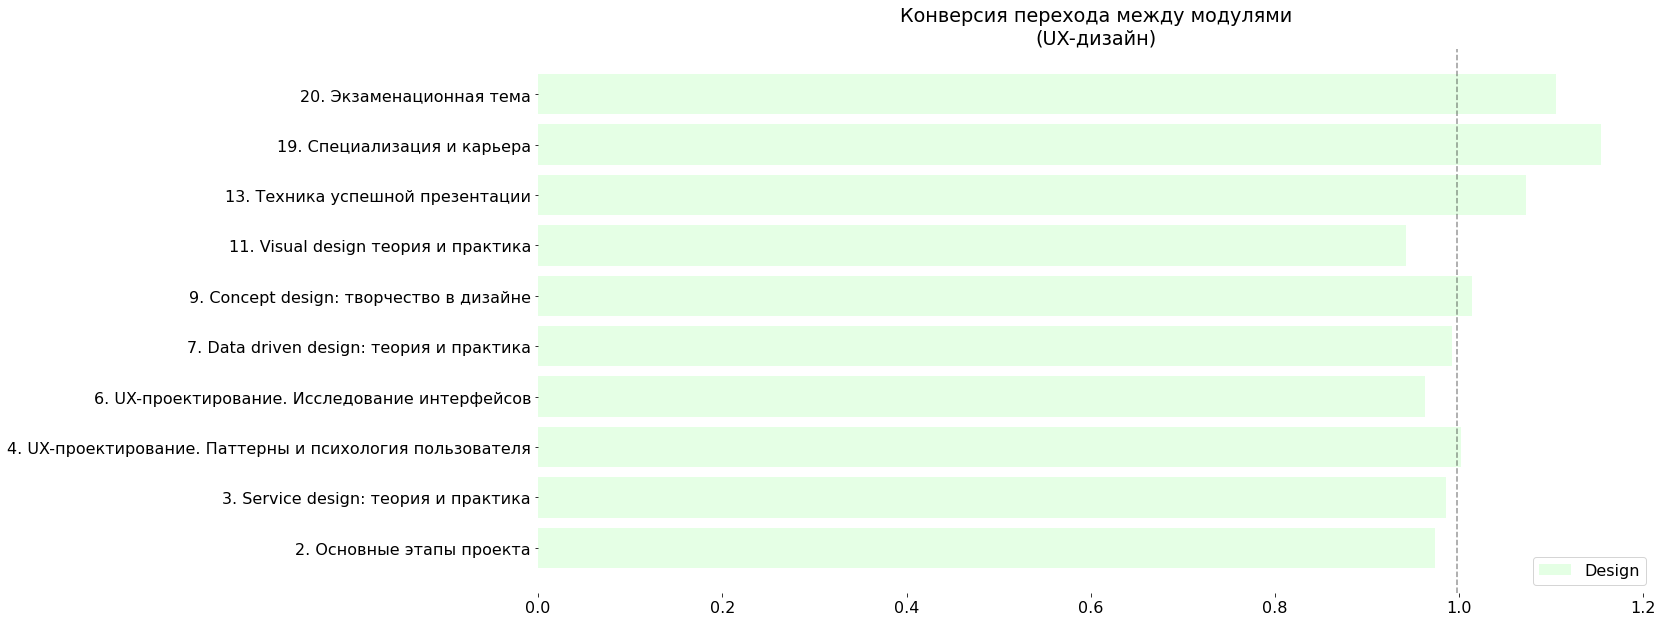

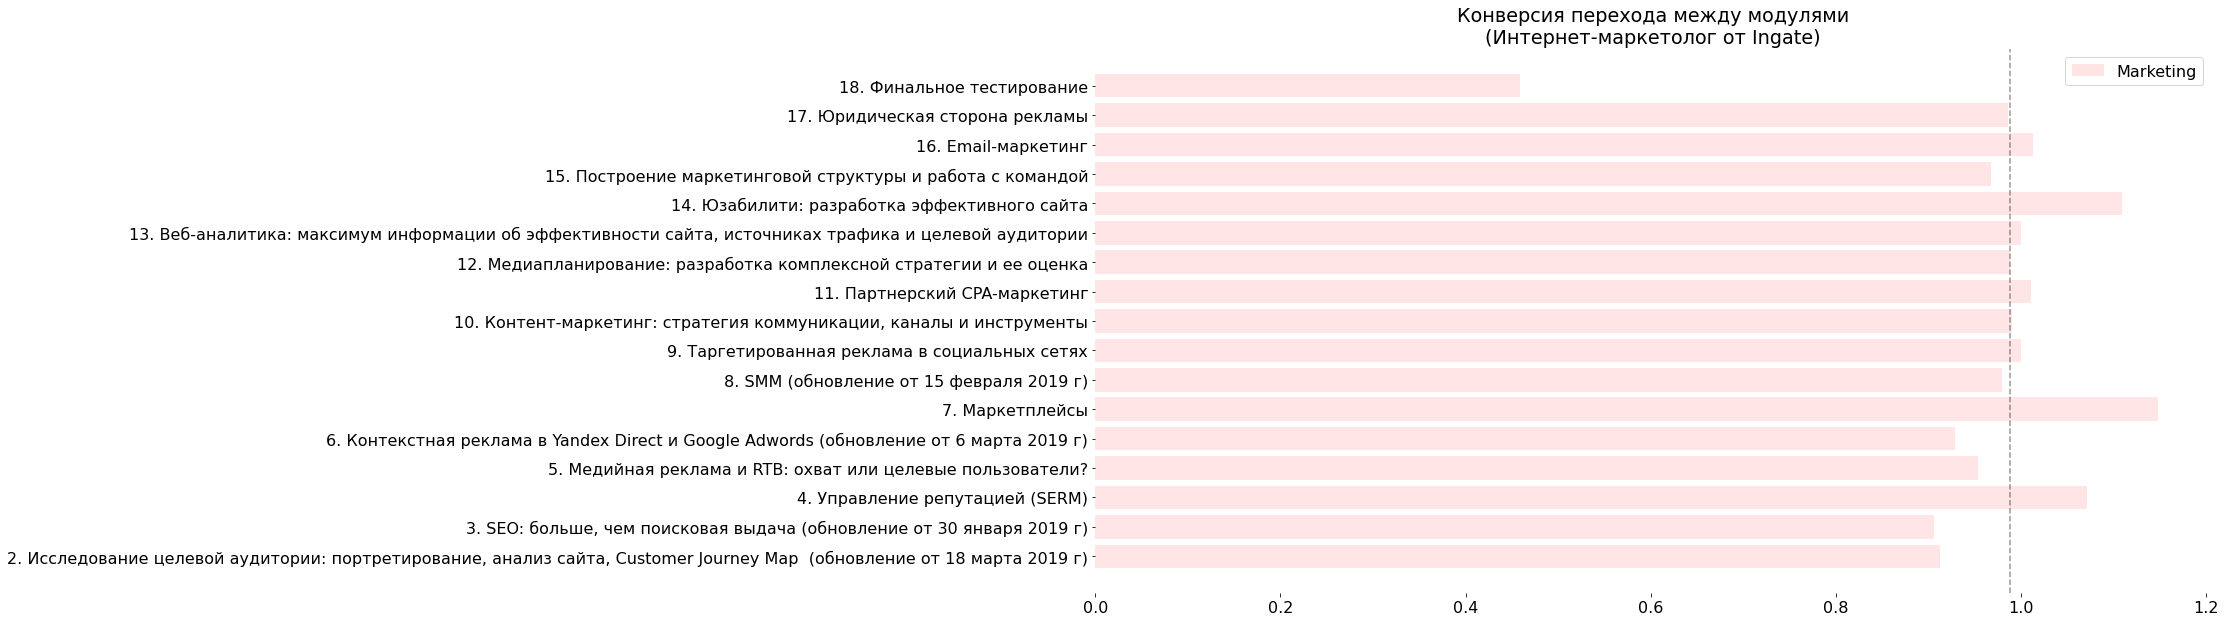

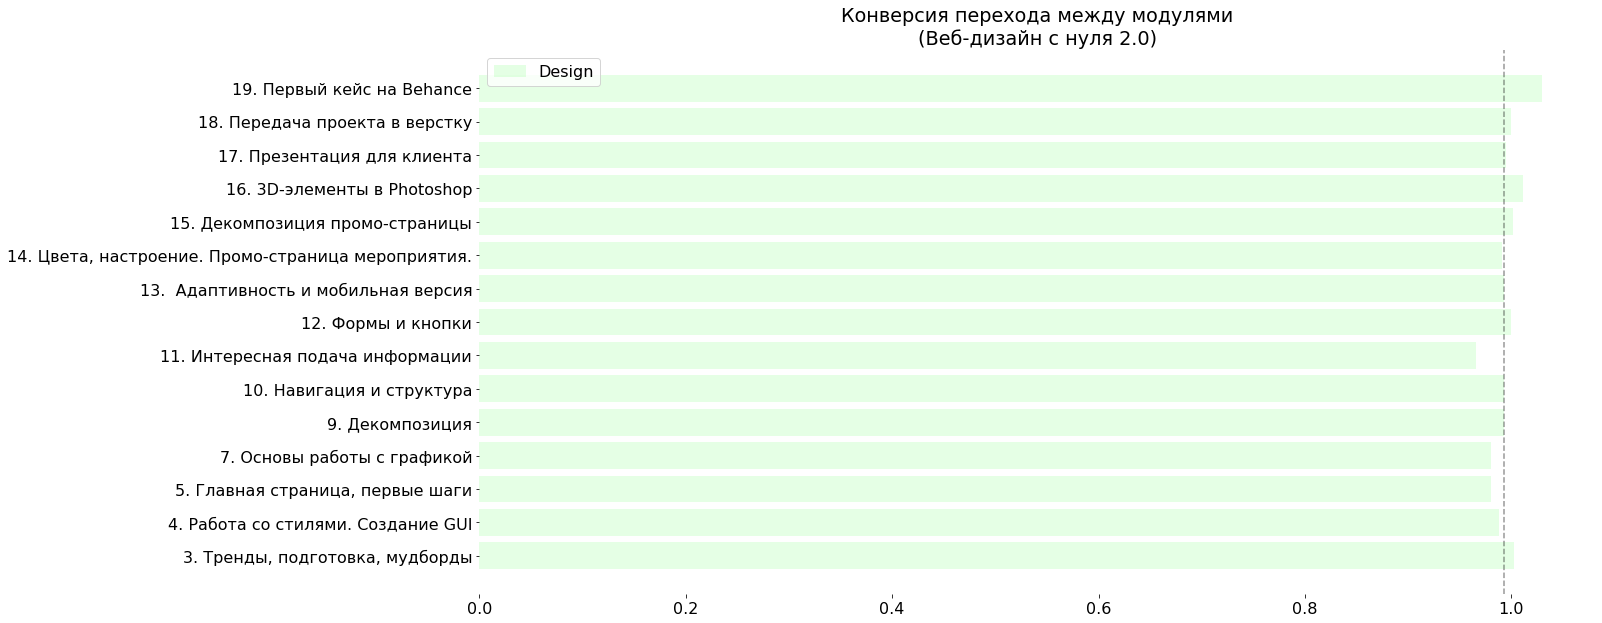

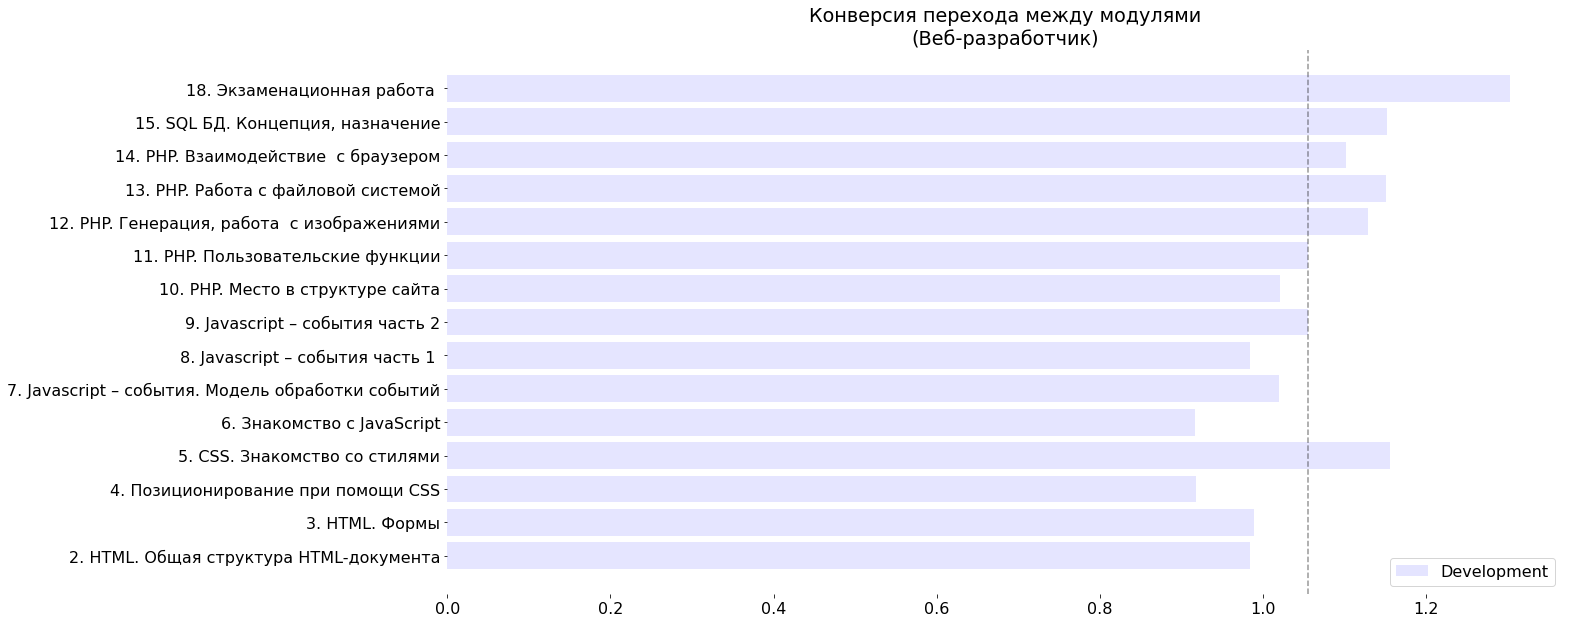

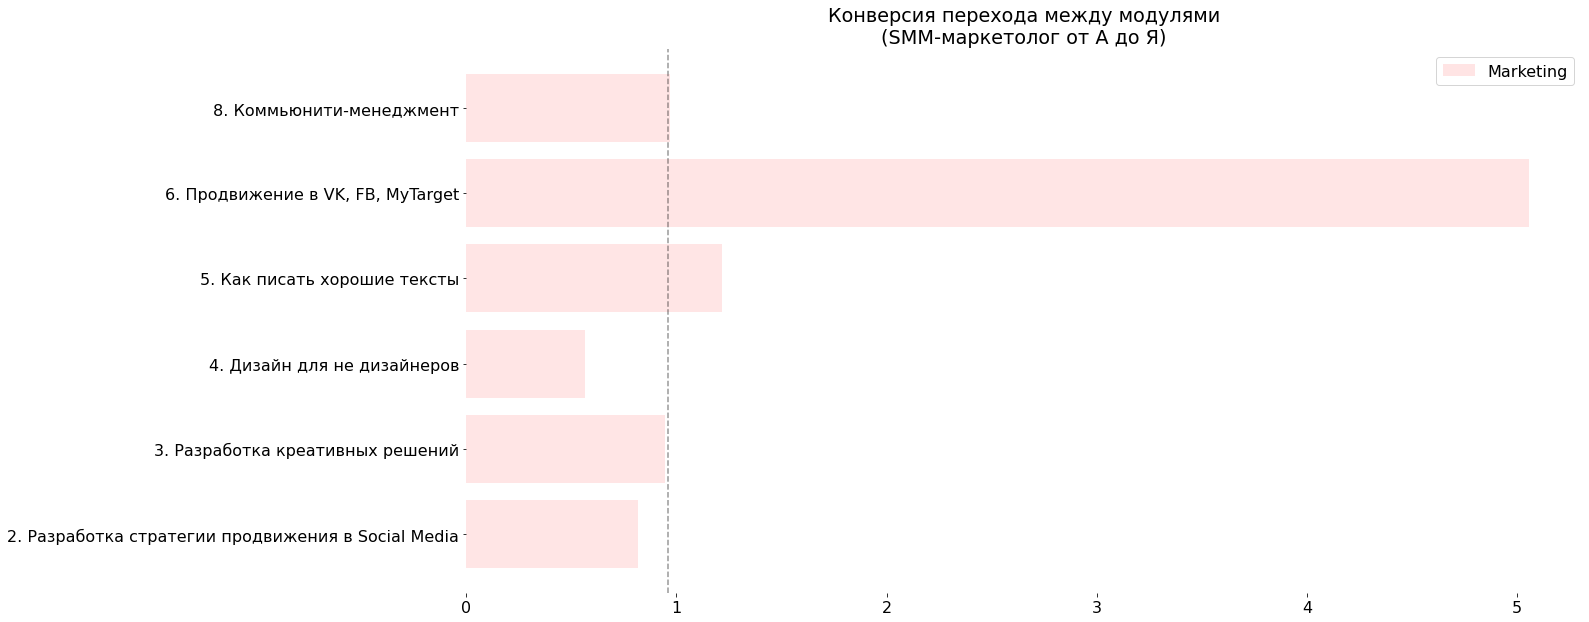

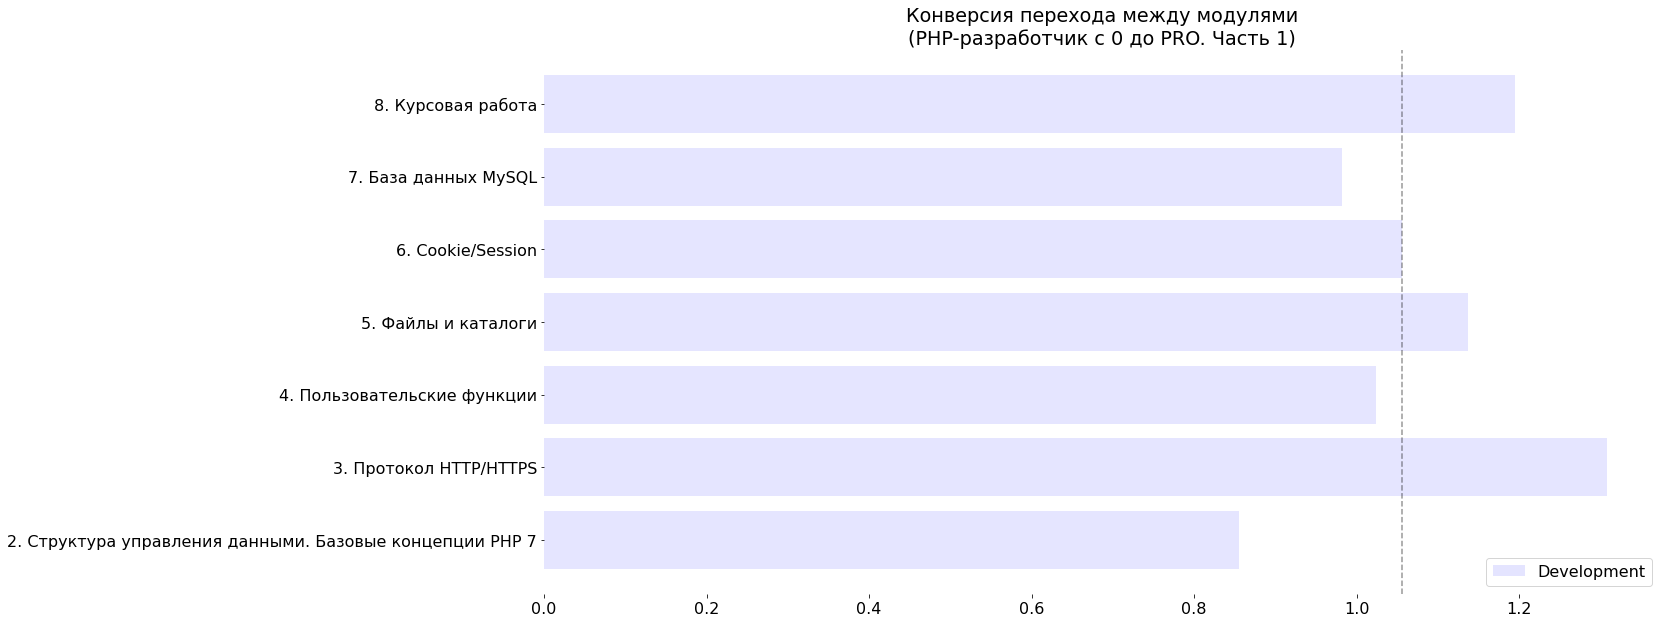

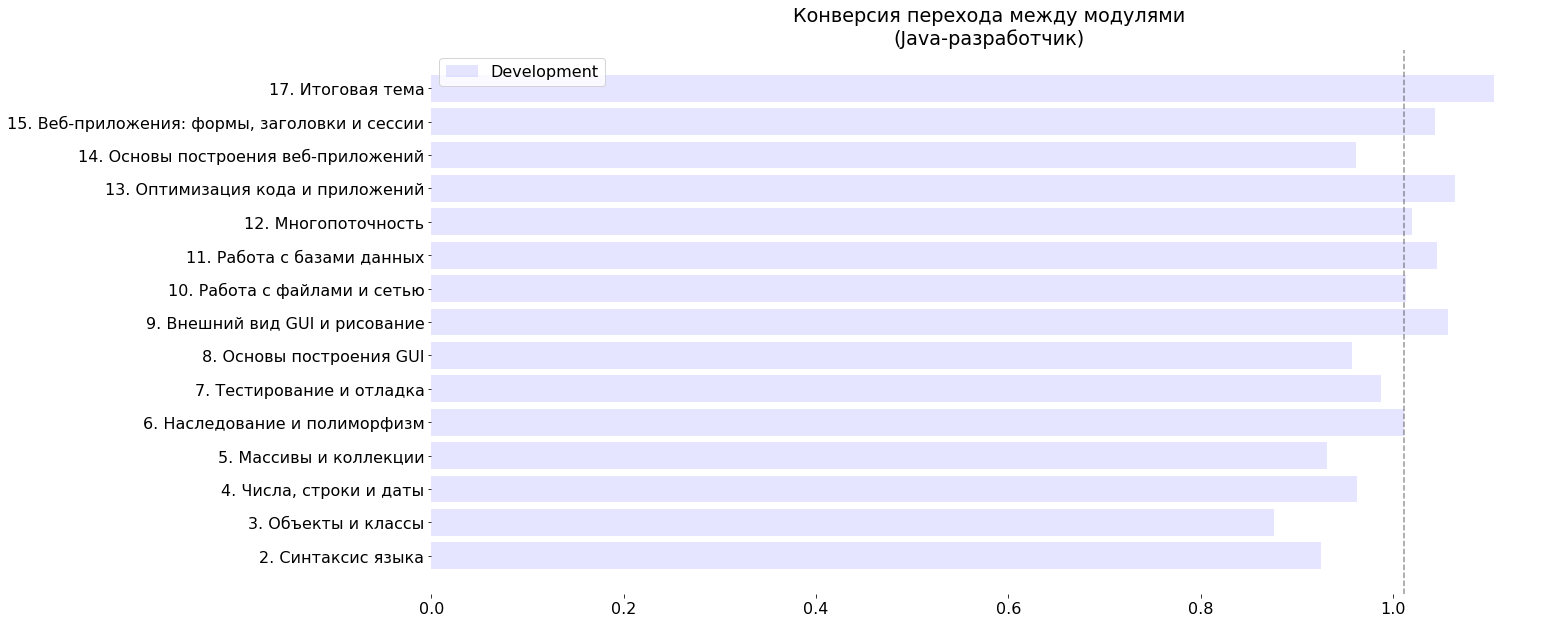

In [21]:
# Используя полученные массивы построим графики
for title in courses['title']:
    plt.figure()
    yvalues = []
    xvalues = []
    module_numbers = module_titles.xs(title).index
    for i in range(len(module_numbers) - 1):
        try:
            yvalues.append(conversion_in.xs(title).xs(module_numbers[i+1]).count()['start_date']\
                           /conversion_out.xs(title).xs(module_numbers[i]).count()['finish_date'])
            xvalues.append(str(module_numbers[i+1]) + '. ' + module_titles['module_title'][(title, module_numbers[i+1])])
        except KeyError: # Для курса Анимация интерфейсов, количество студентов, которые закончили 12 модуль равно нулю
            yvalues.append(0)
            xvalues.append(str(module_numbers[i+1]) + '. ' + module_titles['module_title'][(title, module_numbers[i+1])])
            
    plt.barh(xvalues, yvalues, color=colormapping[courses['field'][title]], label=courses['field'][title])
    plt.title('Конверсия перехода между модулями\n' + '(' + title + ')')
    plt.box(on=None)
    plt.gca().legend()
    mx = np.median(yvalues)
    plt.plot()
    # Рисуем медиану
    plt.axvline(x=mx, ls='--', c='k', alpha=0.4)

### 4.1 Вывод
Величина конверсии студентов от модуля к модулю в некоторых местах превышает единицу. Это может объяснятся тем, что студенты проходили модули не последовательно, оставляя некоторые задания более ранних модулей незаконченными. Возможно, что скачки конверсии между модулями также могут являться индикаторами проблемных модулей.
Также можно заметить, что многие из модулей с конверсией больше единицы - это бонусные модули, необязательные для прохождения. Таким образом, многие студенты, скорее всего, туда даже не заглядывают.

## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

### 5.1 Разработка метрики
Можно предположить, что студенты время прохождения каждого модуля которыми сильно больше медианного значения по всем студентам данного курса попадают в группу риска тех, кто в ближайшее время покинет курс. В качестве времени прохождения модуля берем разницу между временем начала выполнения первого задания и временем сдачи последнего задания в модуле. Эта разница уже была посчитана выше в датасете `dates`. Посмотрим, как выглядят распределения студентов по временам выполнения заданий. Для этого построим соответствующие распределения в виде гистограмм.

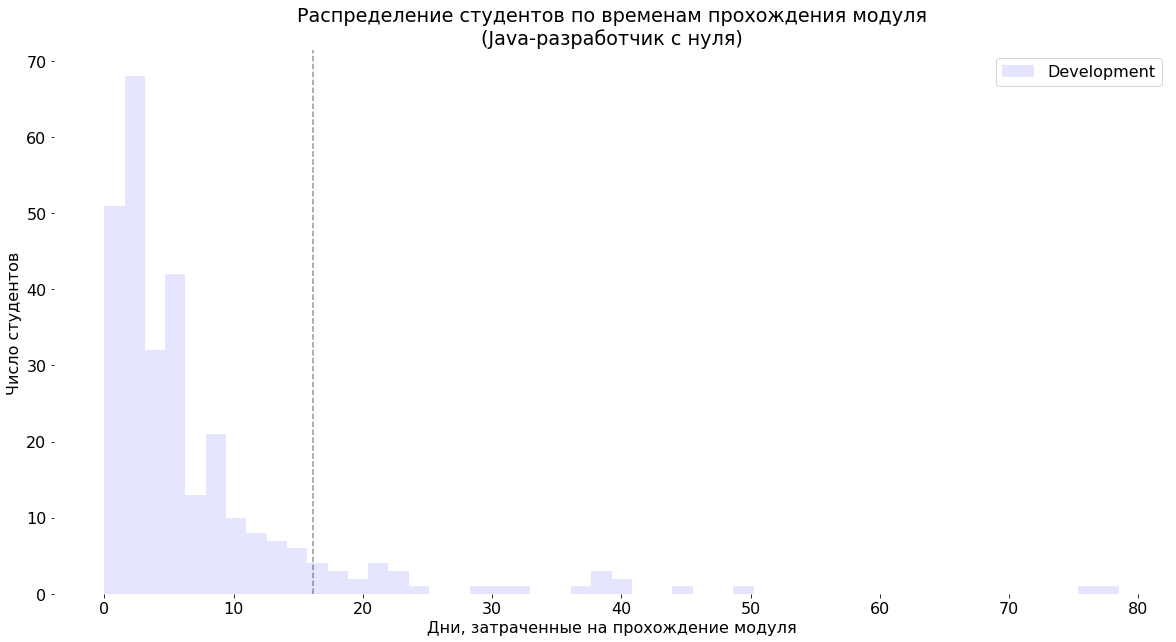

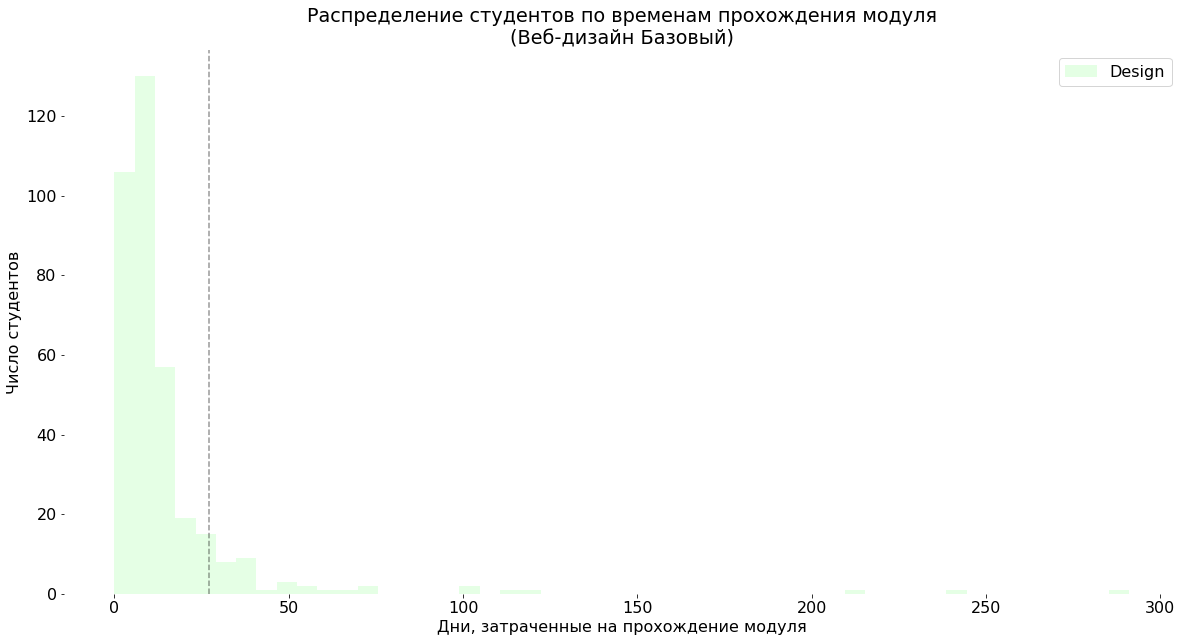

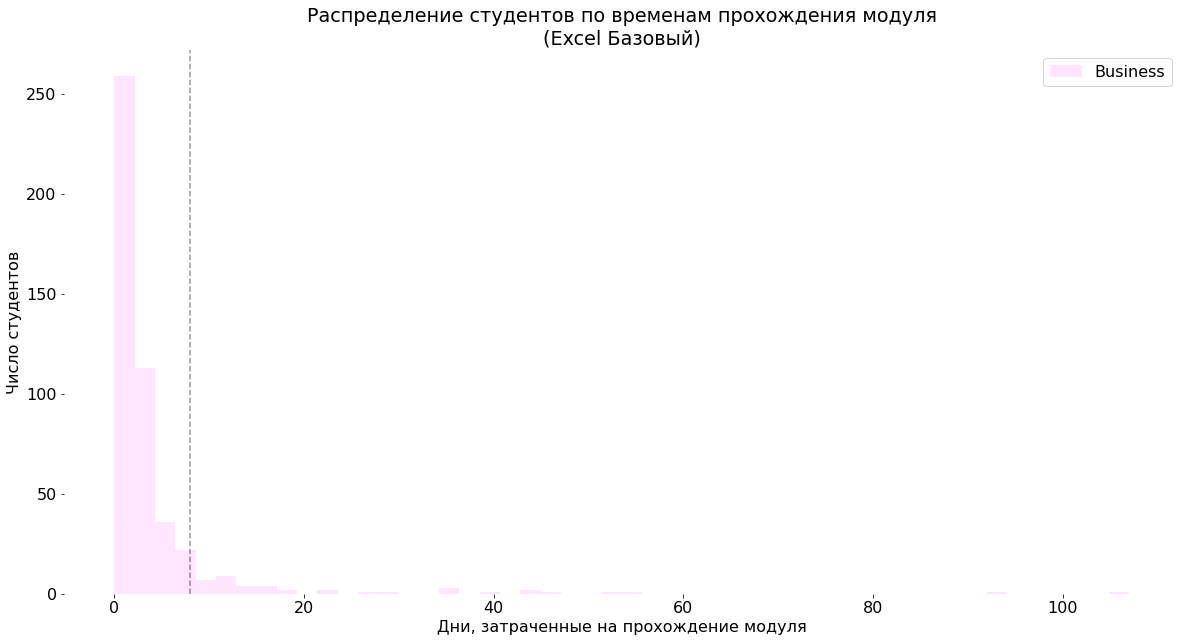

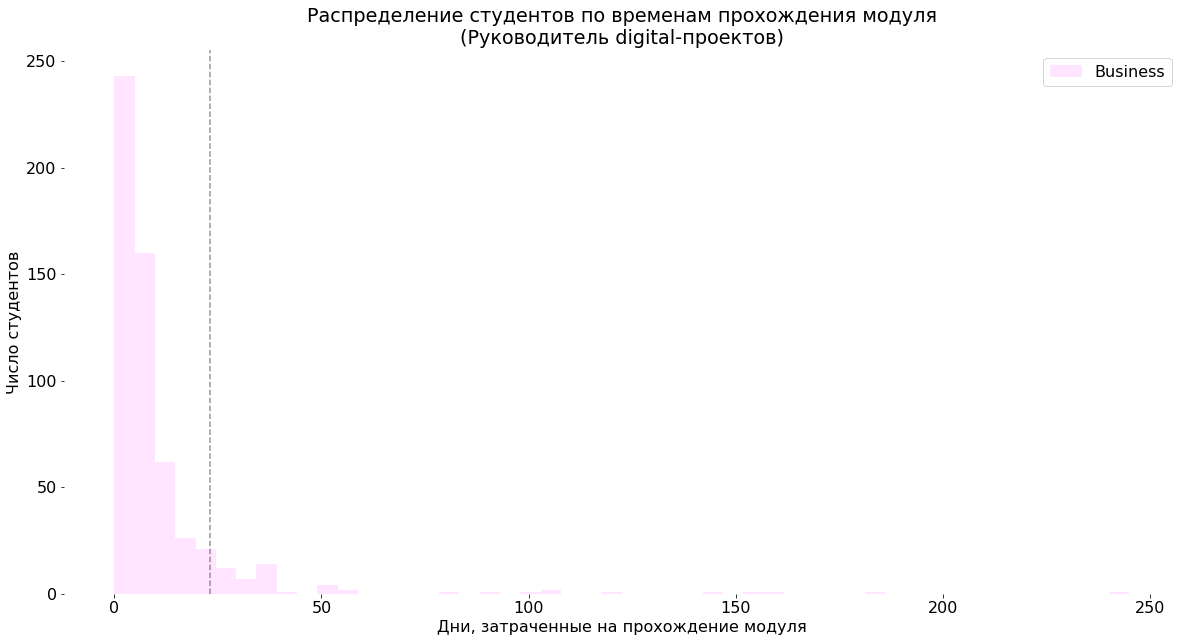

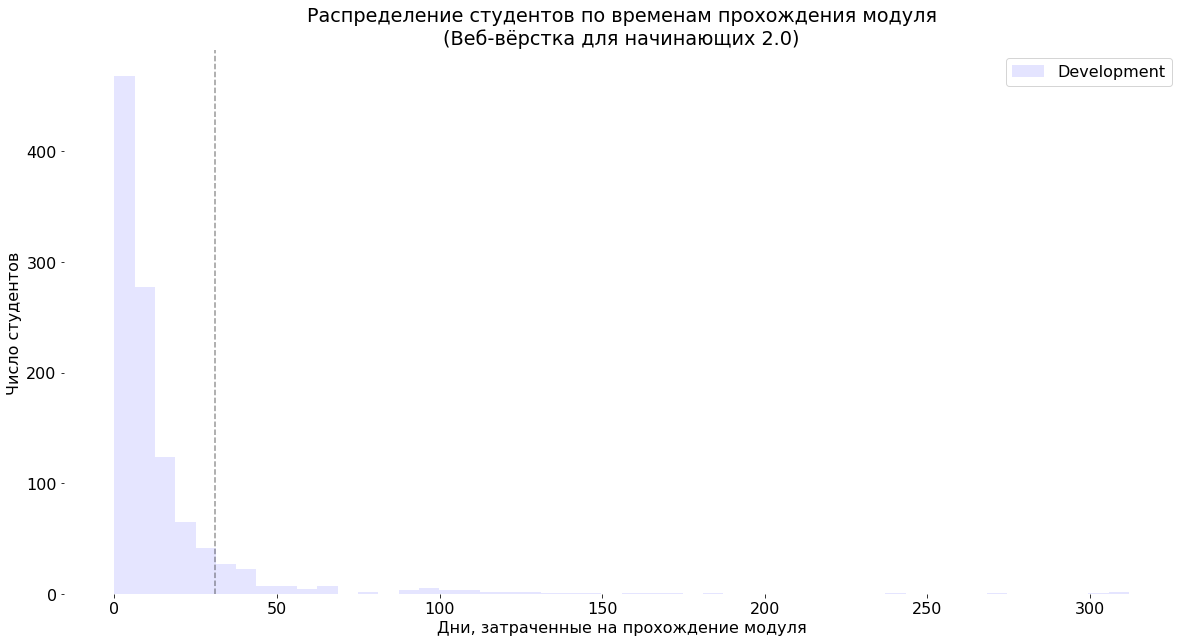

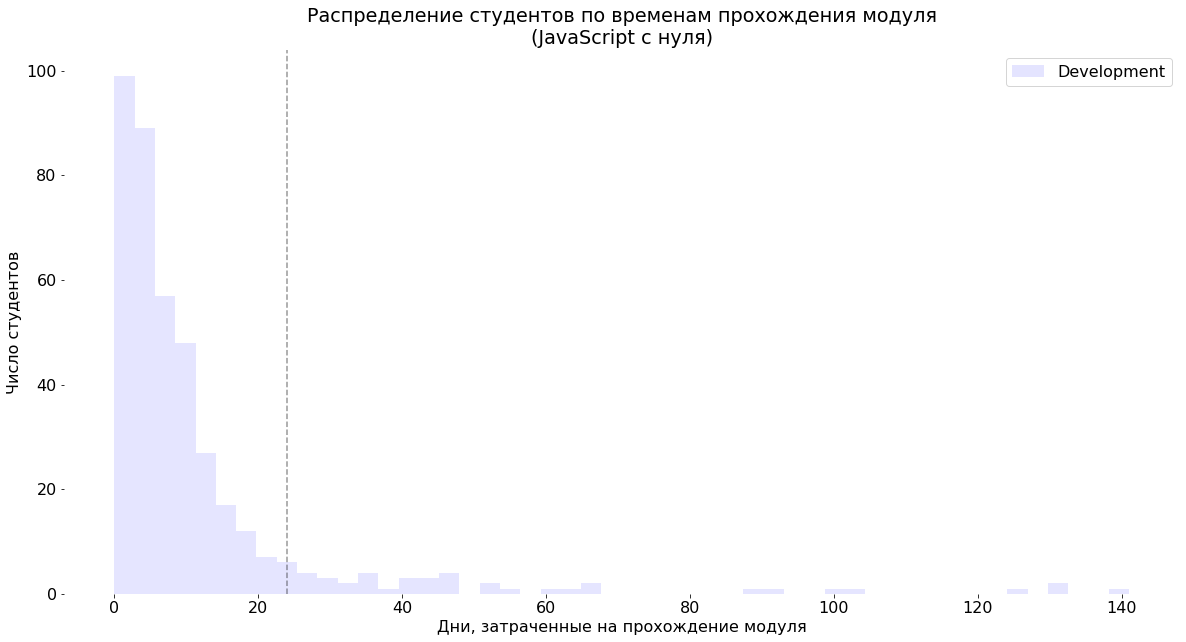

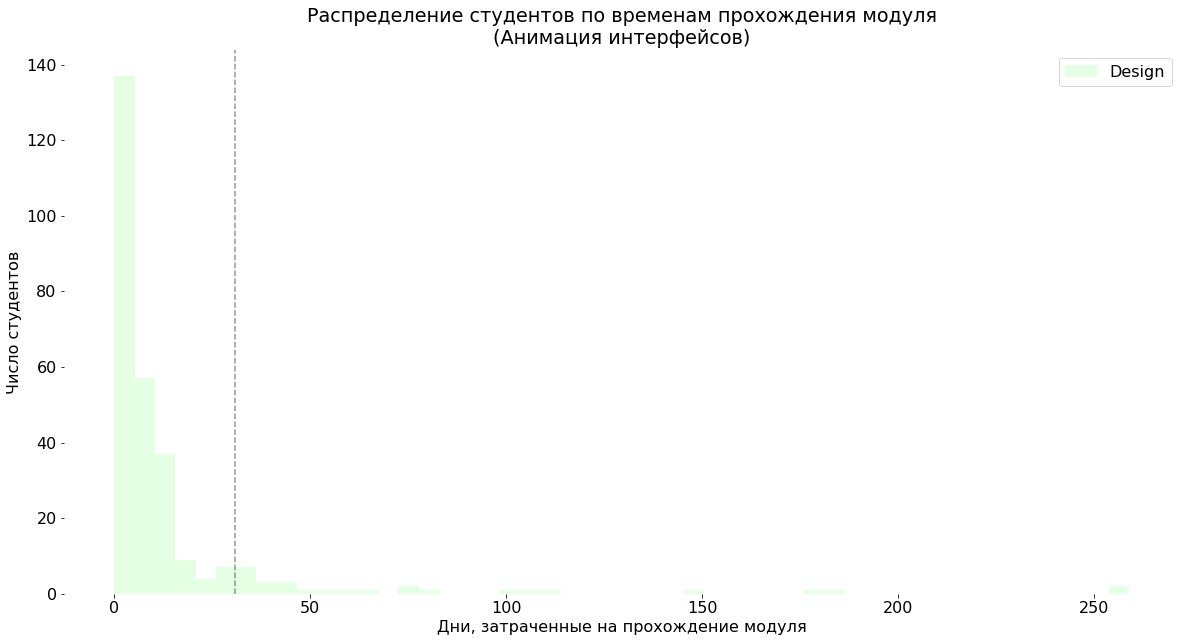

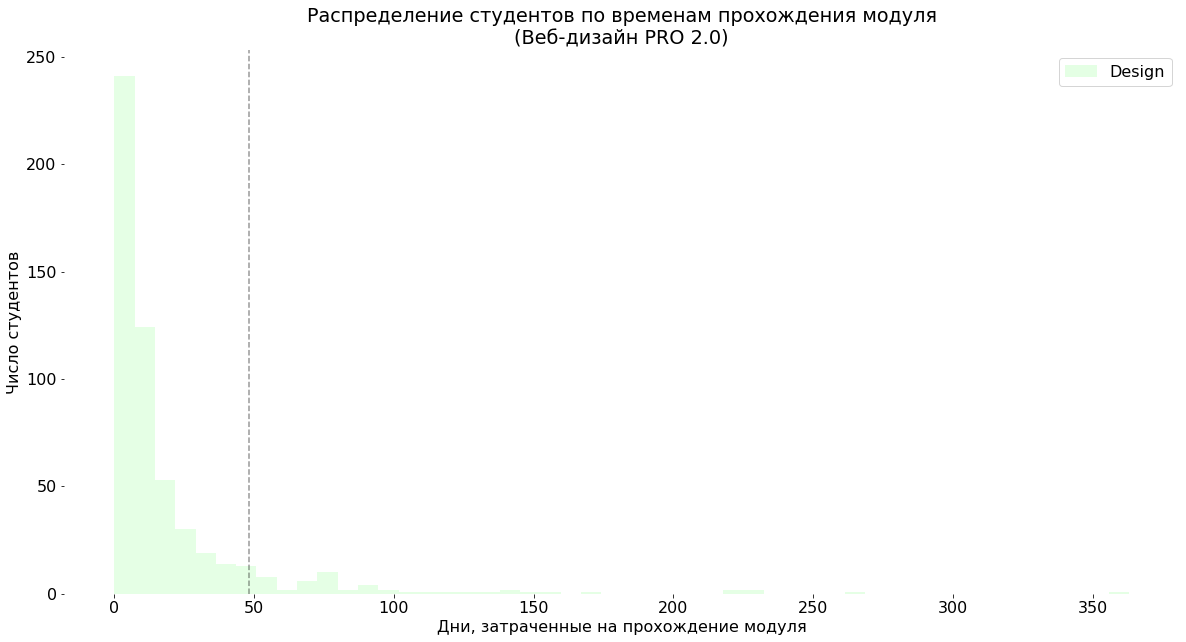

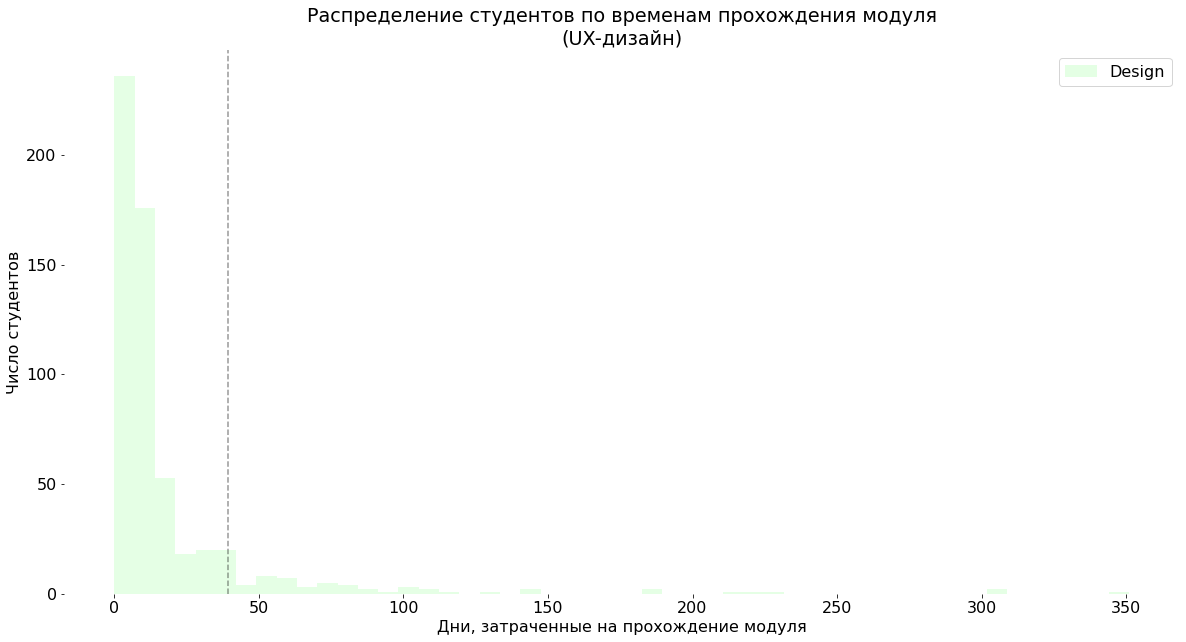

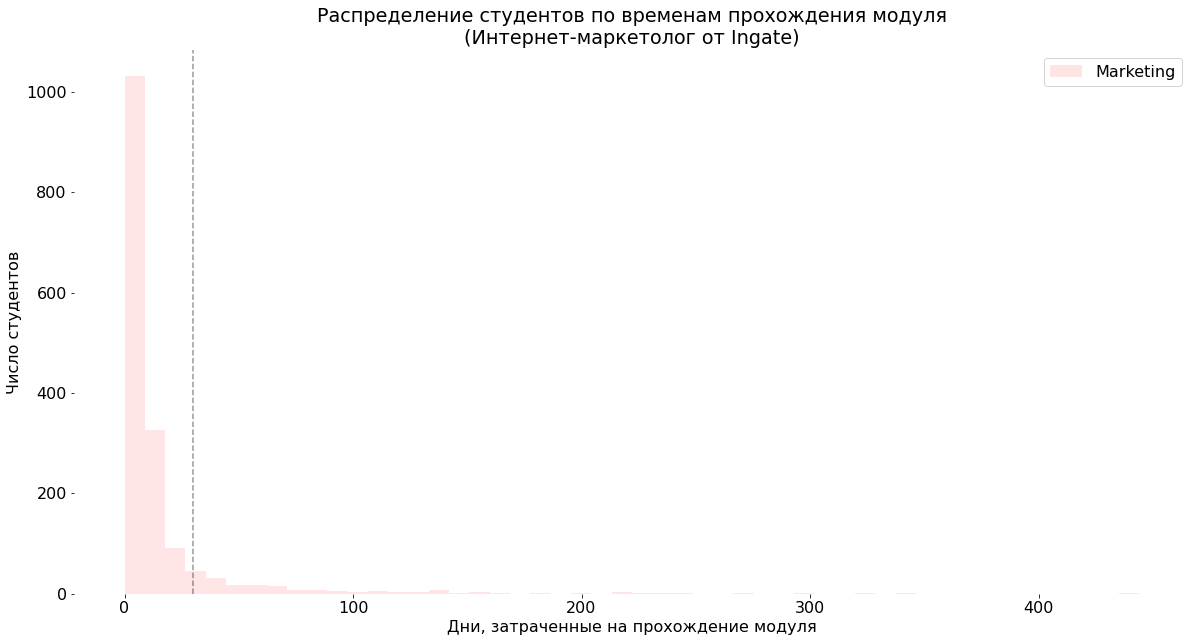

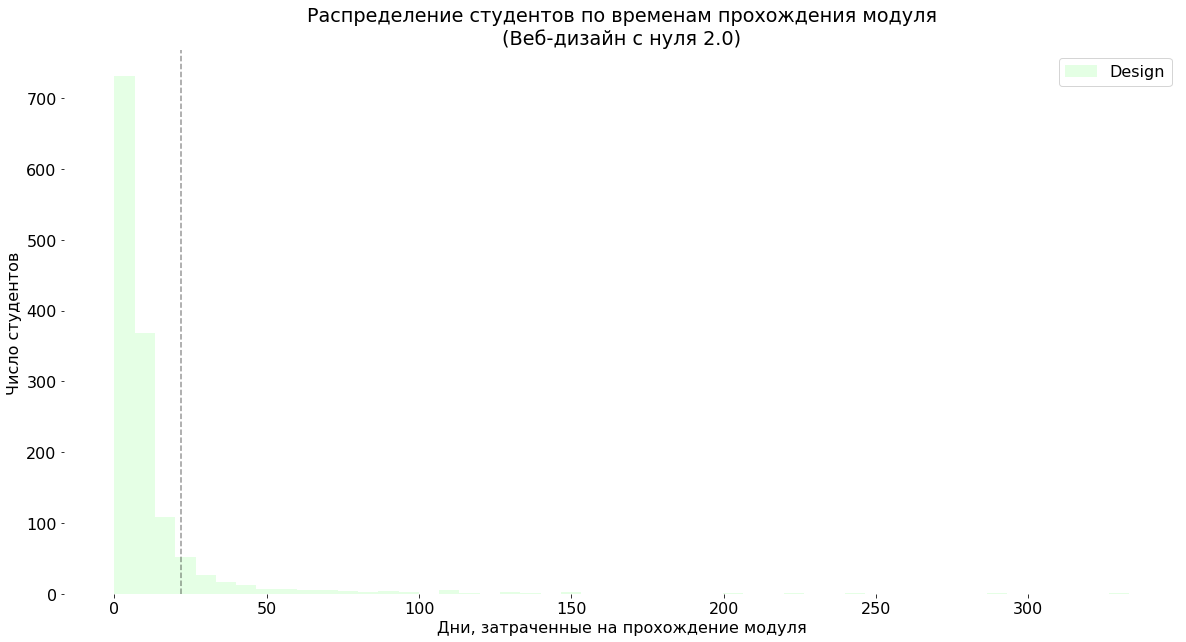

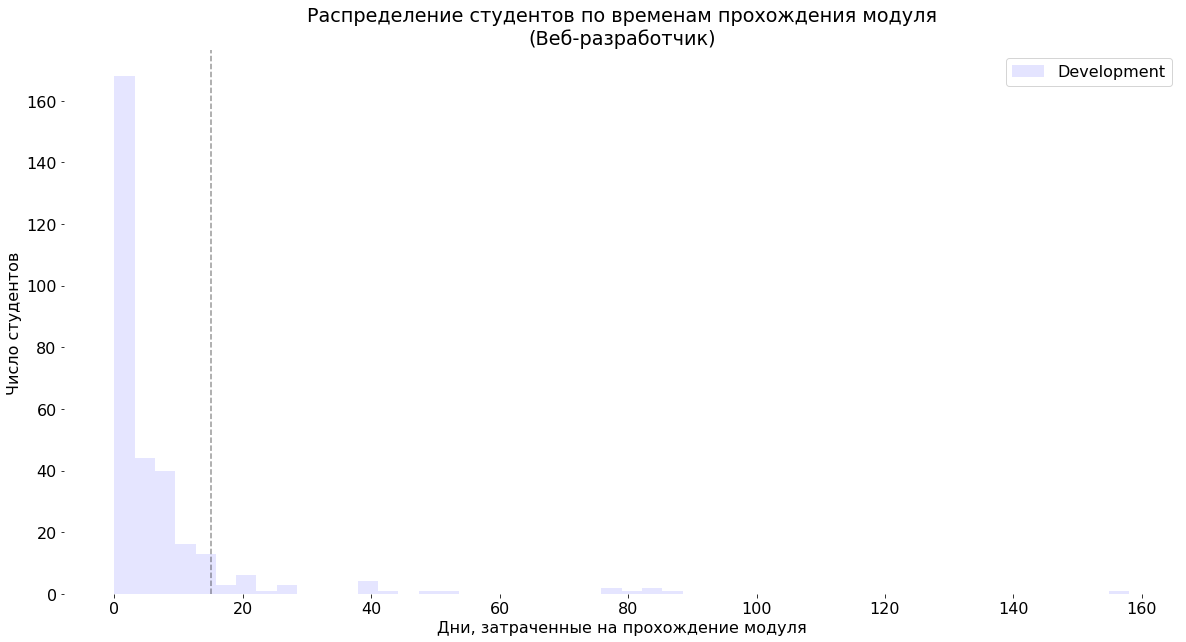

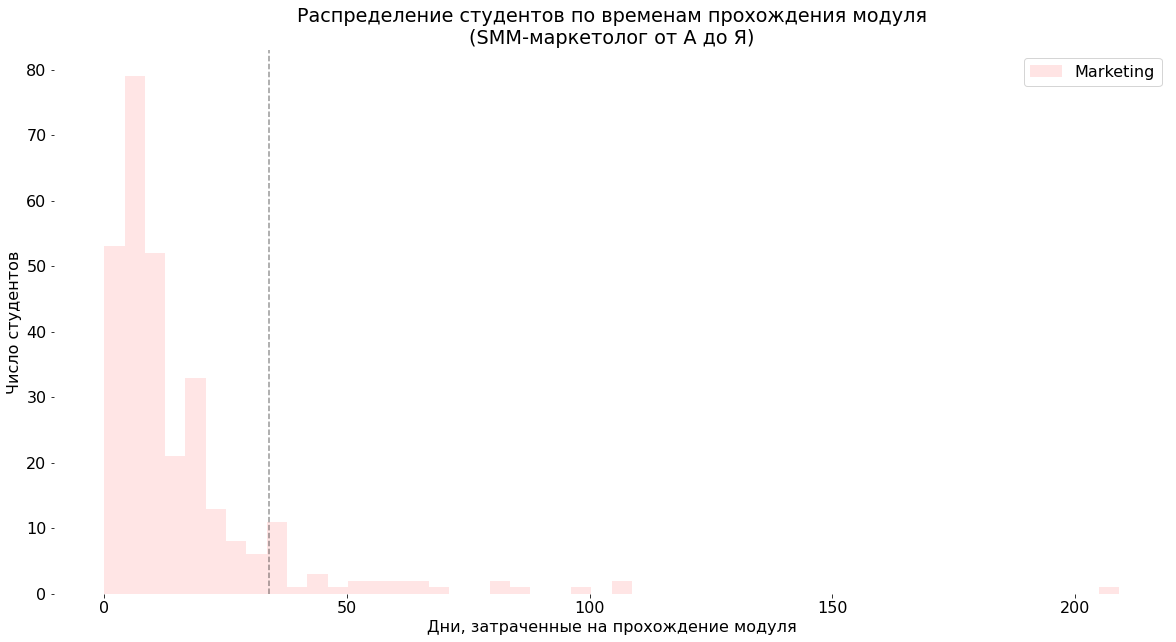

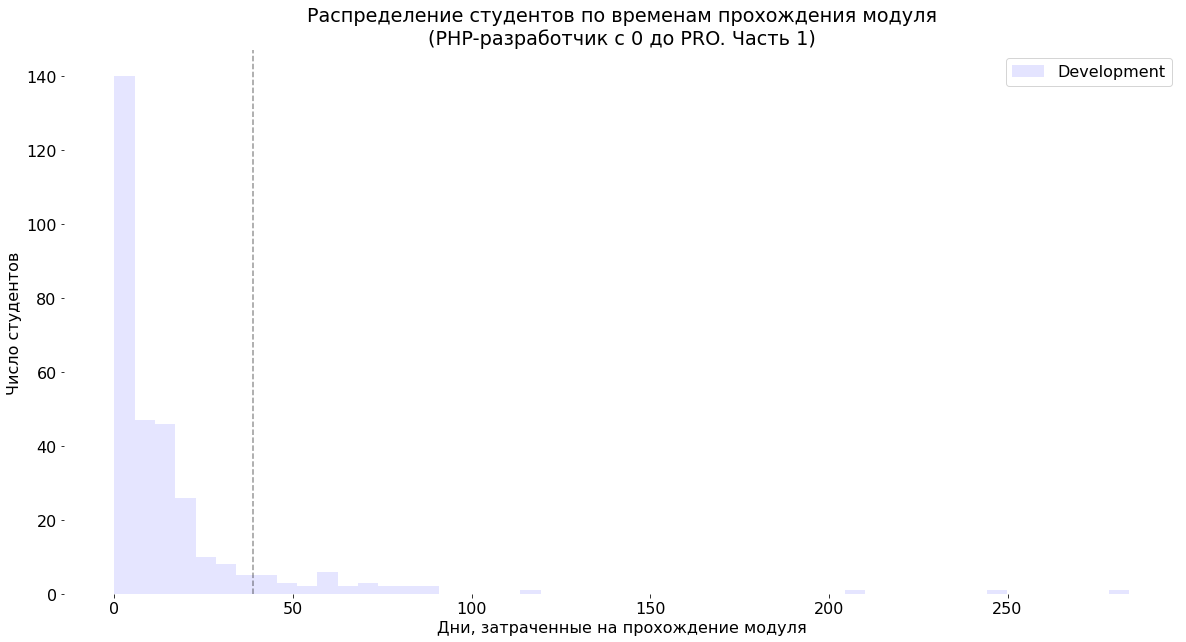

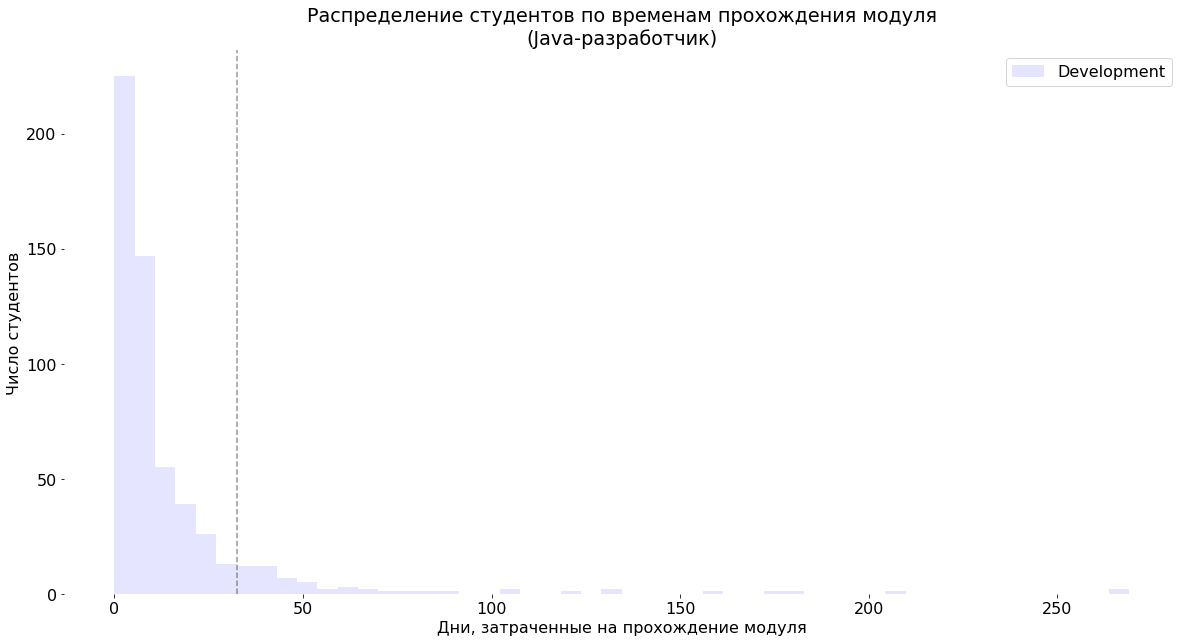

In [22]:
# Сделаем отдельный датасет с временем прохождения модуля каждым студентом на каждом курсе
hist_data = dates.groupby(['title', 'student_id'])['time'].median()

# Строим соотвествующие гистограммы
# Поскольку полученные гистограммы имеют длинные хвосты в сторону больших времен, то в качестве метрики
# неблагонадежности можно использовать не медианное время выполнения, а квантиль 0.9.
# Линии соответствующих квантилей показаны на графиках. Понятно, что с использованием такой метрики 
# 10% студентов автоматически попадет в список неблагонадежных, поэтому, возможно, что величину нужно еще уменьшить.
quantile = 0.9
for title in courses['title']:
    plt.figure()
    plt.hist(np.array(hist_data.xs(title)), bins=50, color = colormapping[courses['field'][title]], \
             label=courses['field'][title])
    plt.box(on=None)
    plt.title('Распределение студентов по временам прохождения модуля\n' + '(' + title + ')')
    plt.legend()
    plt.xlabel('Дни, затраченные на прохождение модуля')
    plt.ylabel('Число студентов')
    q = hist_data.xs(title).quantile(quantile)
    ylims = plt.ylim()
    plt.axvline(x=q, ls='--', c='k', alpha=0.4)

In [23]:
# Выделим id неблагонадежных студентов
untrustable_id = np.array(['a'], dtype=str)

for title in courses['title']:
    student_id = np.array(hist_data.xs(title).index.get_level_values('student_id'), dtype=str)
    above_quantile = np.array(hist_data.xs(title) > hist_data.xs(title).quantile(quantile), dtype=bool)
    untrustable_id = np.hstack((untrustable_id, student_id[above_quantile]))

untrustable_id = pd.DataFrame(untrustable_id)
untrustable_id.columns = ['id']
print("10% Студентов, которым мы не доверяем:")
print("=================================")
untrustable_id.drop(0)

10% Студентов, которым мы не доверяем:


,id
1,08ce9b07fb92e0f178013b042107ed26
2,0c251a8aad10d70c574ae587486d5b5f
3,19012861b82ec7c3065ec11124f669e0
4,1939e2d828f831cbbe578be1db1c6d55
5,2c849c9ec86bbe132550211831eaf9ad
...,...
893,eb23b36ee0f420888ca1f983a3697dc1
894,eb972a4b29289d157d0277ddeb625d97
895,ef3c8c2f27f576c69a97d1ef3cd4e66e
896,f551cd167f453c44061407ef8fa56783
